# Homework Assignment 7

In [0]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn
!pip install nltk
!pip install plotly_express

import nltk
nltk.download('stopwords')
nltk.download('punkt')

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install

     |████████████████████████████████| 91.8MB 60kB/s 
     |████████████████████████████████| 3.4MB 41.6MB/s 
     |████████████████████████████████| 86.3MB 57kB/s 
     |████████████████████████████████| 327kB 45.0MB/s 
     |████████████████████████████████| 3.8MB 40.3MB/s 
     |████████████████████████████████| 450kB 44.2MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=8c8d19460b9f6be943963eae8e7d4fa6db4f455742998b791da7aaa1adbe7740
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=5731fd280f900b4129ba09508e0dc0034ad6b799af66831ca90946c1451eaa30
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
 

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180944 sha256=e3fe3c17a541924b0f541feb3d8c3b7de25523160597c619408999b2922f1732
  Stored in directory: /tmp/pip-ephem-wheel-cache-zxlg_ez0/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


**Connect to Kaggle**

In [0]:
# see more details in the course first lecture
!mkdir /root/.kaggle/
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"", "key":""}  # TODO: REMOVE THIS LINE!!!

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


**Question 1:** Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt). Visualize the network using Cytoscape or Gephi (20pt).


**Download from Kaggle**

In [0]:
DATASET_NAME = 'dickens'
KAGGLE_REPO = 'fuzzyfroghunter/dickens'

In [0]:
# searching for the dataset
!rm -r ./datasets/$DATASET_NAME/
!mkdir -p ./datasets/$DATASET_NAME/data
!mkdir -p ./datasets/$DATASET_NAME/zip
!mkdir -p ./datasets/$DATASET_NAME/sql
!ls datasets/$DATASET_NAME/data

!kaggle datasets list -s $DATASET_NAME
# download the dataset from Kaggle and unzip it
!kaggle datasets download $KAGGLE_REPO -p ./datasets/$DATASET_NAME/zip
!unzip ./datasets/$DATASET_NAME/zip/*.zip -d ./datasets/$DATASET_NAME/data
!ls ./datasets/$DATASET_NAME/zip/
!ls ./datasets/$DATASET_NAME/data/
!ls ./datasets/$DATASET_NAME/sql/

ref                                                         title                                             size  lastUpdated          downloadCount  
----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  
fuzzyfroghunter/dickens                                     The Works of Charles Dickens                       9MB  2017-10-14 16:39:49            611  
joshmcadams/jane-austin-and-charles-dickens                 Jane Austin and Charles Dickens                   18MB  2020-05-07 18:17:56              4  
elibooklover/victorian400                                   Victorian400                                     489MB  2019-12-05 01:21:37             30  
raynardj/classic-english-literature-corpus                  Classic English Literature Corpus and Meta Data  160MB  2019-11-25 03:14:40             32  
federalreserve/30-day-a2-p2-commercial-paper-interest-rate  30-Day A2/P2 Commercia

In [0]:
import spacy
nlp = spacy.load('en_core_web_lg')  # On Colab - Need to restart runtime before import the spacy package
DATASET_PATH = f'./datasets/{DATASET_NAME}/data/{DATASET_NAME}'

**Let's create a network among the book characters and the locations. (*Select two books and construct networks of people and locations, i.e. each link is between a a person and a location (20pt)*)
A link in the network will be between a person to location that appeared in the same paragraph:**

In [0]:
from tqdm import tqdm
from collections import Counter

def get_persons_links(txt):
    links_set = set()
    doc = nlp(txt)
    p = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "PERSON"]
    l = [entity.text.lower().strip() for entity in doc.ents if entity.label_ == "LOC"]
    
    for e1 in p:
        for e2 in l:
          if e1 == e2:
            continue
          links_set.add((e1,e2))

    return links_set

def get_links_list(BOOK_PATH):
  txt = open(BOOK_PATH,"r", encoding="utf8", errors="ignore").read()
  paragraphs_list = txt.split("\n\n")
  links_list = []    
  for para in tqdm(paragraphs_list):
      para = para.replace("\n", " ")
      # for each paragraph each link counts only once
      links_list += list(get_persons_links(para))
  return links_list


**Book #1: Little Dorrit**

In [0]:
BOOK_CODE = '963-0'  # Little Dorrit
BOOK_PATH = f'{DATASET_PATH}/{BOOK_CODE}.txt'  
links_dor = get_links_list(BOOK_PATH)
c_dor = Counter(links_dor)
c_dor.most_common(40)

100%|██████████| 6841/6841 [02:01<00:00, 56.46it/s]


[(('gowan', 'jupiter'), 2),
 (('clennam', 'earth'), 2),
 (('dorrit', 'earth'), 2),
 (('dorrit', 'mediterranean'), 2),
 (('decimus', 'earth'), 2),
 (('mrs meagles', 'pyramids'), 1),
 (('mrs meagles', 'nile'), 1),
 (('cook', 'pyramids'), 1),
 (('tattycoram', 'nile'), 1),
 (('tattycoram', 'pyramids'), 1),
 (('cook', 'nile'), 1),
 (('dorrit', 'marshalsea'), 1),
 (('william shakespeare', 'pyramids'), 1),
 (('captain barbary', 'high holborn'), 1),
 (('arthur clennam', 'high holborn'), 1),
 (('plornish', 'high holborn'), 1),
 (('barbary', 'high holborn'), 1),
 (('arthur', 'high holborn'), 1),
 (('maroon', 'high holborn'), 1),
 (('casby', 'valley'), 1),
 (('dorrit', 'valley'), 1),
 (('summerhouses', 'valley'), 1),
 (('pancks', 'the thames river'), 1),
 (('arthur clennam', 'the thames river'), 1),
 (('flora', 'gulf'), 1),
 (('f.', 'gulf'), 1),
 (('jeremiah', 'it--'), 1),
 (('arthur', 'it--'), 1),
 (('little dorrit', 'mediterranean'), 1),
 (('clennam', 'mediterranean'), 1),
 (('sebastian del pio

In [0]:
import networkx as nx

def create_graph(c):
  g = nx.Graph()

  for e,count in dict(c).items():
      v1,v2 = e
      g.add_edge(v1,v2, weight=count)
      g.nodes[v1]['Type'] = 'PERSON'
      g.nodes[v2]['Type'] = 'LOC'
  nx.info(g)
  return g

In [0]:
g_dor = create_graph(c_dor)

In [0]:
from google.colab import files

gephi_name_file = f"network_{BOOK_CODE}.gexf"
""" Write to GEXF """
# Use 1.2draft so you do not get a deprecated warning in Gelphi
d = nx.degree(g_dor)
# print(d)
d = [(d[node]+1) * 10 for node in g_dor.nodes()]
nx.info(g_dor)
nx.write_gexf(g_dor, gephi_name_file, version="1.2draft")
files.download(gephi_name_file) 

**Gephi**  (*Visualize the network using Cytoscape or Gephi (20pt)*)
[Click here to view full size](https://github.com/nevoit/Analyzing-Big-Data-Course/blob/master/figures/hw_7_dorrit.png?raw=true)
![alt text](https://github.com/nevoit/Analyzing-Big-Data-Course/blob/master/figures/hw_7_dorrit.png?raw=true)

**Book #2: Bleak House**

In [0]:
BOOK_CODE = 'pg1023'  # Bleak House
BOOK_PATH = f'{DATASET_PATH}/{BOOK_CODE}.txt'  
links_bh = get_links_list(BOOK_PATH)
c_bh = Counter(links_bh)
c_bh.most_common(40)

100%|██████████| 7450/7450 [02:05<00:00, 59.35it/s]


[(('jellyby', 'africa'), 9),
 (('vholes', 'vale'), 5),
 (('ma', 'africa'), 4),
 (('richard', 'africa'), 3),
 (('summerson', 'africa'), 3),
 (('tulkinghorn', 'earth'), 3),
 (('bagnet', 'europe'), 3),
 (('peepy', 'africa'), 2),
 (('boythorn', 'earth'), 2),
 (('snagsby', 'cursitor street'), 2),
 (('badger', 'mediterranean'), 2),
 (('dingo', 'mediterranean'), 2),
 (('tom', 'earth'), 2),
 (('bagnet', 'north america'), 2),
 (("joe pouch's", 'north america'), 2),
 (('leicester dedlock', 'chesney wold'), 2),
 (('jellyby', 'hatton garden'), 2),
 (('turveydrop', 'hatton garden'), 2),
 (('vholes', 'earth'), 2),
 (('lady dedlock', 'earth'), 2),
 (('jarndyces', 'earth'), 1),
 (('tom jarndyce', 'earth'), 1),
 (('jarndyce', 'earth'), 1),
 (('chizzle', 'mizzle'), 1),
 (('jarndyce', 'africa'), 1),
 (('kenge', 'africa'), 1),
 (('ada', 'africa'), 1),
 (('jarndyce', 'thavies inn'), 1),
 (('jellyby', 'thavies inn'), 1),
 (('peepy', 'thavies inn'), 1),
 (('jellyby', 'west elevation'), 1),
 (('jarndyce', 'we

In [0]:
g_bh = create_graph(c_bh)

In [0]:
gephi_name_file = f"network_{BOOK_CODE}.gexf"
""" Write to GEXF """
# Use 1.2draft so you do not get a deprecated warning in Gelphi
d = nx.degree(g_bh)
# print(d)
d = [(d[node]+1) * 10 for node in g_bh.nodes()]
nx.info(g_bh)
nx.write_gexf(g_bh, gephi_name_file, version="1.2draft")
files.download(gephi_name_file)

**Gephi** (*Visualize the network using Cytoscape or Gephi (20pt).*)
[Click here to view full size](https://github.com/nevoit/Analyzing-Big-Data-Course/blob/master/figures/hw_7_bleak_house.png?raw=true)
![alt text](https://github.com/nevoit/Analyzing-Big-Data-Course/blob/master/figures/hw_7_bleak_house.png?raw=true)

**Question 2:** Use the [Friends TV Show Transcript](https://www.kaggle.com/ryanstonebraker/friends-transcript)
to create and evaluate a classifier that given a line of text can predict
 who is the "friend" that said it (20pt). Using sentiment analysis identify who are the most and less friendly friends (20pt). Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).

In [0]:
DATASET_NAME = 'friends'
KAGGLE_REPO = 'ryanstonebraker/friends-transcript'

In [0]:
# searching for the dataset
!rm -r ./datasets/$DATASET_NAME/
!mkdir -p ./datasets/$DATASET_NAME/data
!mkdir -p ./datasets/$DATASET_NAME/zip
!mkdir -p ./datasets/$DATASET_NAME/sql
!ls datasets/$DATASET_NAME/data

!kaggle datasets list -s $DATASET_NAME
# download the dataset from Kaggle and unzip it
!kaggle datasets download $KAGGLE_REPO -p ./datasets/$DATASET_NAME/zip
!unzip ./datasets/$DATASET_NAME/zip/*.zip -d ./datasets/$DATASET_NAME/data
!ls ./datasets/$DATASET_NAME/zip/
!ls ./datasets/$DATASET_NAME/data/
!ls ./datasets/$DATASET_NAME/sql/

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
hwassner/TwitterFriends                                 Twitter Friends                                   175MB  2016-09-02 13:28:00           2100  
rezaghari/friends-series-dataset                        Friends Series Dataset                             20KB  2020-04-26 04:54:19             37  
delayedkarma/fantasy-premier-league-20182019            Fantasy Premier League (FPL) 2018-2019            143KB  2018-11-23 22:50:17           1986  
sogun3/uspollution                                      U.S. Pollution Data                                26MB  2016-11-04 17:32:56          14576  
doaaalsenani/usa-cers-dataset                           US Cars Dataset                             

In [0]:
import pandas as pd
import numpy as np

FILE_PATH = f'./datasets/{DATASET_NAME}/data/friends_quotes.csv'
#Reading the Data
df = pd.read_csv(FILE_PATH)
df = df.replace({np.nan: None})
df

author  episode_number  ... quote_order season
0        Monica             1.0  ...         0.0    1.0
1          Joey             1.0  ...         1.0    1.0
2      Chandler             1.0  ...         2.0    1.0
3        Phoebe             1.0  ...         3.0    1.0
4        Phoebe             1.0  ...         4.0    1.0
...         ...             ...  ...         ...    ...
60286  Chandler            17.0  ...       581.0   10.0
60287    Rachel            17.0  ...       582.0   10.0
60288    Monica            17.0  ...       583.0   10.0
60289    Rachel            17.0  ...       584.0   10.0
60290  Chandler            17.0  ...       585.0   10.0

[60291 rows x 6 columns]

**Let's see the data report**

In [0]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile

**Some minor fixes**

In [0]:
friends_list = ['rachel', 'ross', 'monica', 'chandler', 'joey', 'phoebe']
df_fixes = df.copy()
df_fixes['author'] = df_fixes['author'].apply(lambda x: x.lower())
df_fixes = df_fixes[df_fixes['author'].isin(friends_list)]
df_fixes

author  episode_number  ... quote_order season
0        monica             1.0  ...         0.0    1.0
1          joey             1.0  ...         1.0    1.0
2      chandler             1.0  ...         2.0    1.0
3        phoebe             1.0  ...         3.0    1.0
4        phoebe             1.0  ...         4.0    1.0
...         ...             ...  ...         ...    ...
60286  chandler            17.0  ...       581.0   10.0
60287    rachel            17.0  ...       582.0   10.0
60288    monica            17.0  ...       583.0   10.0
60289    rachel            17.0  ...       584.0   10.0
60290  chandler            17.0  ...       585.0   10.0

[49506 rows x 6 columns]

**Let's see the data report again (with the fixes)**

In [0]:
profile = ProfileReport(df_fixes, title='Pandas Profiling Report (with fixes)', explorative=True)
profile

**Covert to Turicreate**

In [0]:
import turicreate as tc

g = tc.SFrame(data=df_fixes)
g

Columns:
	author	str
	episode_number	float
	episode_title	str
	quote	str
	quote_order	float
	season	float

Rows: 49506

Data:
+----------+----------------+------------------------+
|  author  | episode_number |     episode_title      |
+----------+----------------+------------------------+
|  monica  |      1.0       | Monica Gets A Roommate |
|   joey   |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
|  phoebe  |      1.0       | Monica Gets A Roommate |
|  phoebe  |      1.0       | Monica Gets A Roommate |
|  monica  |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
|   joey   |      1.0       | Monica Gets A Roommate |
+----------+----------------+------------------------+
+-------------------------------+-------------+--------+
|             quote             | quote_order | season |
+-------------------------------+-------------+--------+
| There's nothing to tell! H... |     0.0     |  1.0   |
| C'mon, you're going out wi... |     1.0     |  1.0   |
| All right Joey, be nice. S... |     2.0     |  1.0   |
|    Wait, does he eat chalk?   |     3.0     |  1.0   |
| Just, 'cause, I don't want... |     4.0     |  1.0   |
| Okay, everybody relax. Thi... |     5.0     |  1.0   |
|   Sounds like a date to me.   |     6.0     |  1.0   |
| Alright, so I'm back in hi... |     7.0     |  1.0   |
| Then I look down, and I re... |     9.0     |  1.0   |
|         Instead of...?        |     10.0    |  1.0   |
+-------------------------------+-------------+--------+
[49506 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
!pip install afinn
!pip install textblob

**Create features**

In [0]:
from afinn import Afinn
from textblob import TextBlob

afinn = Afinn()

main_feature_name = 'quote'
g[f'{main_feature_name} Words'] = tc.text_analytics.count_words(g[main_feature_name])
g[f'{main_feature_name} Words WSW'] = g[f'{main_feature_name} Words'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
g[f'{main_feature_name} 1 gram'] = tc.text_analytics.count_ngrams(g[main_feature_name], n=1, method='word')
g[f'{main_feature_name} 2 grams'] = tc.text_analytics.count_ngrams(g[main_feature_name], n=2, method='word')
g[f'{main_feature_name} 3 grams'] = tc.text_analytics.count_ngrams(g[main_feature_name], n=3, method='word')
g[f'{main_feature_name} TF-IDF'] = tc.text_analytics.tf_idf(g[main_feature_name])
g[f'{main_feature_name} Afinn'] = g[main_feature_name].apply(lambda t: afinn.score(t))
g[f'{main_feature_name} TextBlob Polarity'] = g[main_feature_name].apply(lambda review: TextBlob(review).sentiment.polarity)
g[f'{main_feature_name} TextBlob Subjectivity'] = g[main_feature_name].apply(lambda review: TextBlob(review).sentiment.subjectivity)

features = [
            f'{main_feature_name} Words',
            f'{main_feature_name} Words WSW',
            f'{main_feature_name} 1 gram',
            f'{main_feature_name} 2 grams',
            f'{main_feature_name} 3 grams',
            f'{main_feature_name} TF-IDF',
            f'{main_feature_name} Afinn',
            f'{main_feature_name} TextBlob Polarity',
            f'{main_feature_name} TextBlob Subjectivity',
            'All'
            ]
g.materialize()
g

Columns:
	author	str
	episode_number	float
	episode_title	str
	quote	str
	quote_order	float
	season	float
	quote Words	dict
	quote Words WSW	dict
	quote 1 gram	dict
	quote 2 grams	dict
	quote 3 grams	dict
	quote TF-IDF	dict
	quote Afinn	float
	quote TextBlob Polarity	float
	quote TextBlob Subjectivity	float

Rows: 49506

Data:
+----------+----------------+------------------------+
|  author  | episode_number |     episode_title      |
+----------+----------------+------------------------+
|  monica  |      1.0       | Monica Gets A Roommate |
|   joey   |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
|  phoebe  |      1.0       | Monica Gets A Roommate |
|  phoebe  |      1.0       | Monica Gets A Roommate |
|  monica  |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
| chandler |      1.0       | Monica Gets A Roommate |
|   joey   |      1.0       | Monica Gets A Roommate |
+----------+----------------+------------------------+
+-------------------------------+-------------+--------+
|             quote             | quote_order | season |
+-------------------------------+-------------+--------+
| There's nothing to tell! H... |     0.0     |  1.0   |
| C'mon, you're going out wi... |     1.0     |  1.0   |
| All right Joey, be nice. S... |     2.0     |  1.0   |
|    Wait, does he eat chalk?   |     3.0     |  1.0   |
| Just, 'cause, I don't want... |     4.0     |  1.0   |
| Okay, everybody relax. Thi... |     5.0     |  1.0   |
|   Sounds like a date to me.   |     6.0     |  1.0   |
| Alright, so I'm back in hi... |     7.0     |  1.0   |
| Then I look down, and I re... |     9.0     |  1.0   |
|         Instead of...?        |     10.0    |  1.0   |
+-------------------------------+-------------+--------+
+-------------------------------+--------------------------------+
|          quote Words          |        quote Words WSW         |
+-------------------------------+--------------------------------+
| {'with': 1.0, 'work': 1.0,... |   {'work': 1.0, 'guy': 1.0}    |
| {'him': 1.0, 'wrong': 1.0,... | {'wrong': 1.0, 'gotta': 1....  |
| {'and': 1.0, 'hairpiece': ... | {'hairpiece': 1.0, 'hump':...  |
| {'chalk': 1.0, 'eat': 1.0,... | {'chalk': 1.0, 'eat': 1.0,...  |
| {'carl': 1.0, 'with': 1.0,... |   {'carl': 1.0, 'don': 1.0}    |
| {'and': 1.0, 'to': 1.0, 'o... | {'dinner': 1.0, 'relax': 1...  |
| {'me': 1.0, 'date': 1.0, '... |  {'date': 1.0, 'sounds': 1.0}  |
| {'totally': 1.0, 'of': 1.0... | {'totally': 1.0, 'alright'...  |
| {'realize': 1.0, 'and': 1.... | {'realize': 1.0, 'phone': 1.0} |
|  {'of': 1.0, 'instead': 1.0}  |               {}               |
+-------------------------------+--------------------------------+
+-------------------------------+-------------------------------+
|          quote 1 gram         |         quote 2 grams         |
+-------------------------------+-------------------------------+
| {'with': 1, 'work': 1, 'i'... | {'work with': 1, 'i work':... |
| {'wrong': 1, 'something': ... | {'something wrong': 1, 'be... |
| {'and': 1, 'hump': 2, 'so'... | {'hump and': 1, 'hump a': ... |
| {'he': 1, 'chalk': 1, 'doe... | {'eat chalk': 1, 'he eat':... |
| {'oh': 1, 'carl': 1, 'with... | {'with carl': 1, 'went thr... |
| {'sex': 1, 'having': 1, 'd... | {'having sex': 1, 'not hav... |
| {'me': 1, 'date': 1, 'to':... | {'to me': 1, 'date to': 1,... |
| {'totally': 1, 'realize': ... | {'am totally': 1, 'i am': ... |
| {'phone': 1, 's': 1, 'a': ... | {'phone there': 1, 'i look... |
|    {'of': 1, 'instead': 1}    |       {'instead of': 1}       |
+-------------------------------+-------------------------------+
+-------------------------------+-------------------------------+-------------+
|         quote 3 grams         |          quote TF-IDF         | quote Afinn |
+-------------------------------+-------------------------------+-------------+
|

1. *Use the Friends TV Show Transcript to create and evaluate a classifier that given a line of text can predict who is the "friend" that said it (20pt).*

In [0]:
import copy
models = {}
test, train  = g.random_split(0.2, seed=2020)
for f in features:
  if f == 'All':
    new_features = copy.deepcopy(features)
    train_features = list(set(new_features) - set(['All']))
    models[f] = tc.boosted_trees_classifier.create(train,features=train_features, target="author")
  else:
    models[f] = tc.boosted_trees_classifier.create(train,features=[f], target="author")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 14699

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.340940     | 0.242446          | 0.239536            | 1.770135          | 1.776313            |

| 2         | 0.687266     | 0.249695          | 0.232476            | 1.755118          | 1.766570            |

| 3         | 1.034875     | 0.256518          | 0.238527            | 1.743100          | 1.759500            |

| 4         | 1.374233     | 0.264006          | 0.244075            | 1.733656          | 1.754419            |

| 5         | 1.742657     | 0.273963          | 0.251639            | 1.724258          | 1.747990            |

| 10        | 3.379178     | 0.308082          | 0.266263            | 1.689188          | 1.729299            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 14215

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.206089     | 0.232038          | 0.211296            | 1.772913          | 1.780552            |

| 2         | 0.414783     | 0.238755          | 0.213817            | 1.759800          | 1.771272            |

| 3         | 0.613009     | 0.241092          | 0.219365            | 1.750658          | 1.765630            |

| 4         | 0.813591     | 0.245022          | 0.220373            | 1.742931          | 1.761319            |

| 5         | 1.008811     | 0.251102          | 0.237015            | 1.736190          | 1.756971            |

| 10        | 1.966081     | 0.271520          | 0.232980            | 1.711813          | 1.742729            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 14749

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.345954     | 0.242473          | 0.235502            | 1.770089          | 1.775256            |

| 2         | 0.702110     | 0.250120          | 0.241049            | 1.755038          | 1.766949            |

| 3         | 1.043263     | 0.257474          | 0.235502            | 1.742905          | 1.760235            |

| 4         | 1.382268     | 0.269051          | 0.239536            | 1.732731          | 1.755737            |

| 5         | 1.720852     | 0.275291          | 0.245083            | 1.723932          | 1.751793            |

| 10        | 3.408265     | 0.308985          | 0.262733            | 1.687840          | 1.731773            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 123864

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.725476     | 0.200759          | 0.186082            | 1.783624          | 1.787135            |

| 2         | 1.428067     | 0.207211          | 0.201210            | 1.777535          | 1.783091            |

| 3         | 2.145259     | 0.216956          | 0.206253            | 1.772017          | 1.779304            |

| 4         | 2.848432     | 0.221709          | 0.208270            | 1.767193          | 1.777778            |

| 5         | 3.531238     | 0.227125          | 0.208775            | 1.763093          | 1.776187            |

| 10        | 7.036995     | 0.250597          | 0.225416            | 1.745139          | 1.764442            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 262357

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.336601     | 0.188784          | 0.190620            | 1.786773          | 1.788010            |

| 2         | 2.710658     | 0.191333          | 0.188099            | 1.783172          | 1.785780            |

| 3         | 4.076421     | 0.196113          | 0.190116            | 1.780127          | 1.783682            |

| 4         | 5.433298     | 0.199299          | 0.190620            | 1.777663          | 1.783009            |

| 5         | 6.747330     | 0.202645          | 0.192133            | 1.775622          | 1.782114            |

| 10        | 13.435399    | 0.218576          | 0.197176            | 1.765714          | 1.777164            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 33492

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.395647     | 0.225187          | 0.206253            | 1.776016          | 1.781945            |

| 2         | 0.778517     | 0.233525          | 0.215835            | 1.765018          | 1.774754            |

| 3         | 1.169564     | 0.240375          | 0.216339            | 1.755466          | 1.770078            |

| 4         | 1.553560     | 0.247703          | 0.217852            | 1.747541          | 1.765959            |

| 5         | 1.940656     | 0.256359          | 0.225920            | 1.739844          | 1.761263            |

| 10        | 3.845749     | 0.283708          | 0.224912            | 1.711644          | 1.746982            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.075785     | 0.185094          | 0.180030            | 1.790162          | 1.790490            |

| 2         | 0.141219     | 0.185651          | 0.180535            | 1.789053          | 1.789564            |

| 3         | 0.207717     | 0.185386          | 0.182552            | 1.788291          | 1.788936            |

| 4         | 0.274475     | 0.185784          | 0.180030            | 1.787743          | 1.788538            |

| 5         | 0.347746     | 0.185837          | 0.180535            | 1.787351          | 1.788247            |

| 10        | 0.666497     | 0.185970          | 0.180030            | 1.786436          | 1.787890            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.079275     | 0.195343          | 0.172466            | 1.788487          | 1.791824            |

| 2         | 0.146973     | 0.196007          | 0.165910            | 1.786114          | 1.792352            |

| 3         | 0.215483     | 0.197069          | 0.166414            | 1.784397          | 1.792338            |

| 4         | 0.283121     | 0.199113          | 0.166414            | 1.783078          | 1.792605            |

| 5         | 0.351709     | 0.200680          | 0.170449            | 1.781849          | 1.792222            |

| 10        | 0.677016     | 0.206468          | 0.175492            | 1.777358          | 1.793387            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.082362     | 0.190590          | 0.169440            | 1.789240          | 1.791155            |

| 2         | 0.152300     | 0.192634          | 0.171457            | 1.787468          | 1.790773            |

| 3         | 0.221912     | 0.194759          | 0.168936            | 1.785913          | 1.790563            |

| 4         | 0.292222     | 0.195555          | 0.172466            | 1.784459          | 1.790614            |

| 5         | 0.372866     | 0.196936          | 0.171457            | 1.783333          | 1.790697            |

| 10        | 0.707426     | 0.200866          | 0.170953            | 1.779305          | 1.791574            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 9

Number of unpacked features : 463165

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 3.797889     | 0.242711          | 0.227433            | 1.768641          | 1.775087            |

| 2         | 7.555518     | 0.254713          | 0.237519            | 1.751908          | 1.764789            |

| 3         | 11.385661    | 0.270033          | 0.243066            | 1.739169          | 1.755842            |

| 4         | 15.154643    | 0.277680          | 0.249117            | 1.727373          | 1.746664            |

| 5         | 18.936231    | 0.284584          | 0.253656            | 1.717658          | 1.740688            |

| 7         | 26.436728    | 0.295975          | 0.258195            | 1.701342          | 1.731446            |

| 8         | 30.176126    | 0.301205          | 0.260716            | 1.694403          | 1.726338            |

| 9         | 33.911964    | 0.309224          | 0.270298            | 1.687480          | 1.723622            |

| 10        | 37.642218    | 0.315570          | 0.274836            | 1.680491          | 1.719512            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [0]:
results = {}
compare = {'Feaure Name' : [], 'Accuracy': [], 'AUC': [], 'F1': []}
for feature_name, m in models.items():
  res = m.evaluate(test)
  acc = res['accuracy']
  auc = res['auc']
  f1 = res['f1_score']
  compare['Feaure Name'].append(feature_name)
  compare['Accuracy'].append(acc)
  compare['AUC'].append(auc)
  compare['F1'].append(f1)
  results[feature_name] = res

plot_df = pd.DataFrame.from_dict(compare)
plot_df = plot_df.sort_values(by=['Accuracy', 'AUC'], ascending=False)
plot_df

Feaure Name  Accuracy       AUC        F1
9                          All  0.267924  0.621248  0.256158
2                 quote 1 gram  0.267316  0.614982  0.255119
0                  quote Words  0.259609  0.617206  0.246548
1              quote Words WSW  0.249366  0.594637  0.225867
5                 quote TF-IDF  0.245513  0.601629  0.219532
3                quote 2 grams  0.220160  0.555470  0.165234
4                quote 3 grams  0.193794  0.518153  0.093072
6                  quote Afinn  0.189230  0.511414  0.107584
8  quote TextBlob Subjectivity  0.188622  0.515238  0.111404
7      quote TextBlob Polarity  0.186087  0.511789  0.127314

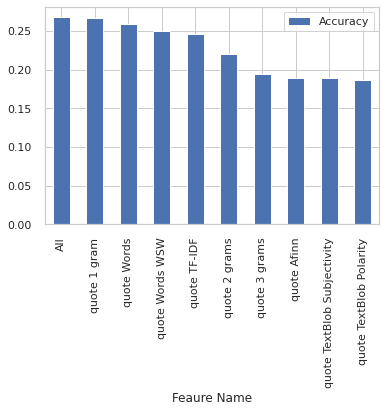

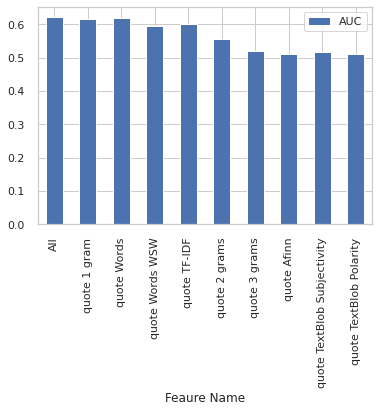

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plot_df.plot.bar(x='Feaure Name', y='Accuracy')
plot_df.plot.bar(x='Feaure Name', y='AUC')

**ROC Curve**

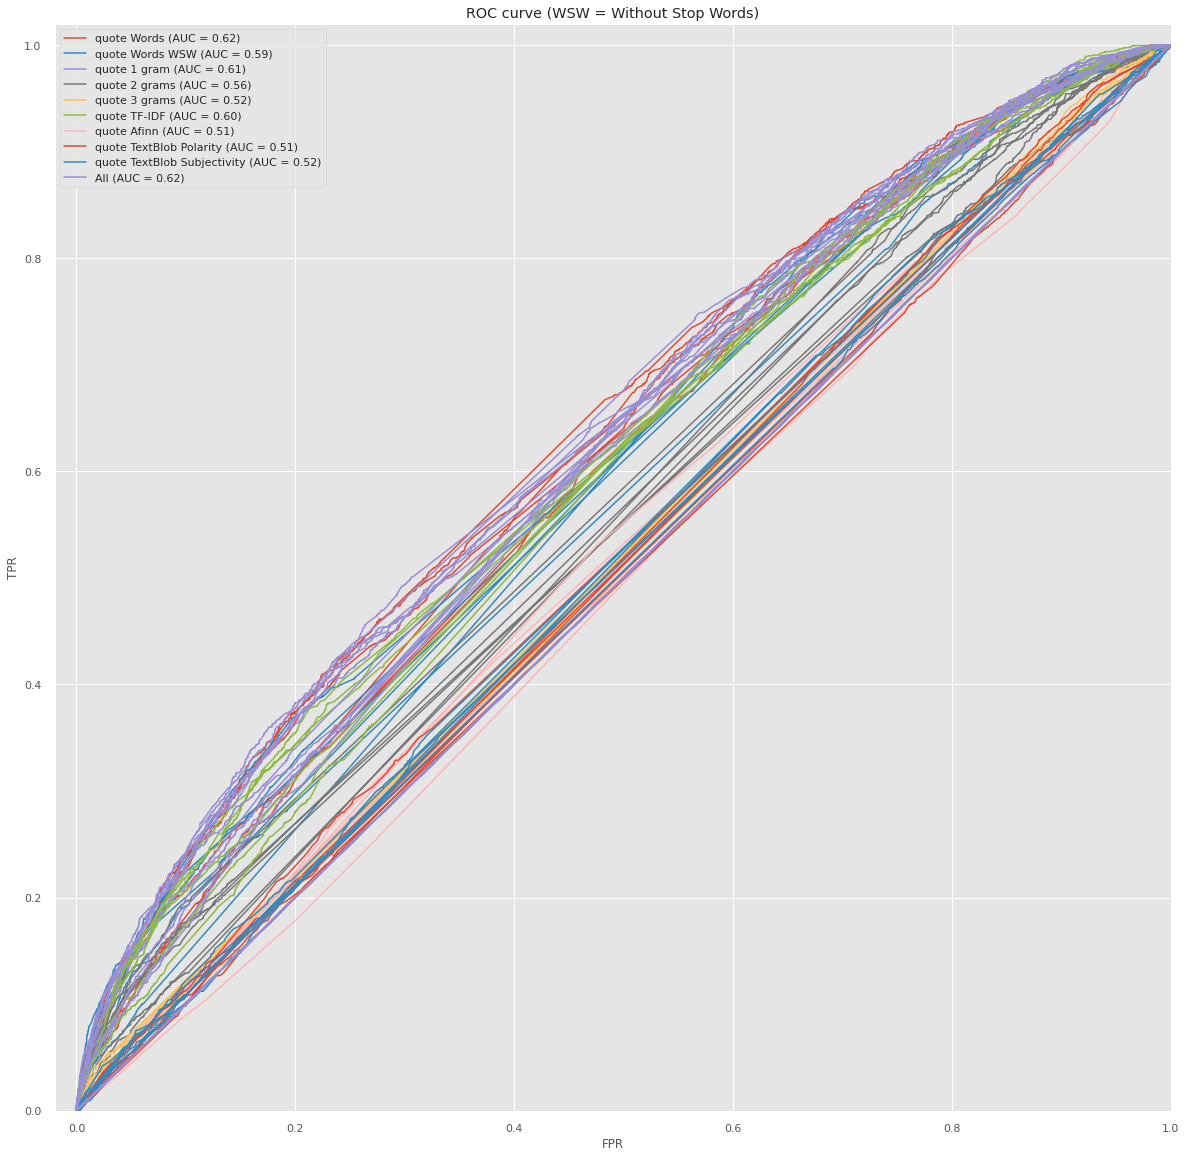

In [0]:
matplotlib.rc('figure', figsize=(20, 20))
plt.style.use('ggplot')
for f_name, result in results.items():
  auc = result['auc']
  plt.plot(result['roc_curve']['fpr'],
          result['roc_curve']['tpr'],
          label=f'{f_name} (AUC = {auc:.2f})')

plt.xlim([-0.02, 1.0])
plt.ylim([0., 1.02])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (WSW = Without Stop Words)')
plt.legend()
plt.show()

**Now let's try the Turicreate built-in classifier**

In [0]:
m = tc.text_classifier.create(train, 'author', features=['quote'])
output = m.classify(test)
output

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 37662

Number of classes           : 6

Number of feature columns   : 1

Number of unpacked features : 7609

Number of coefficients      : 38050

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 5.000000  | 0.112560     | 0.407042          | 0.291478            |

| 1         | 6        | 2.500000  | 1.585659     | 0.421539          | 0.262733            |

| 2         | 8        | 1.324892  | 2.991366     | 0.485157          | 0.284418            |

| 3         | 9        | 1.324892  | 4.296124     | 0.500611          | 0.295512            |

| 4         | 10       | 1.324892  | 5.666965     | 0.514657          | 0.289460            |

| 9         | 17       | 1.000000  | 12.375171    | 0.533084          | 0.259708            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Columns:
	class	str
	probability	float

Rows: 9861

Data:
+----------+---------------------+
|  class   |     probability     |
+----------+---------------------+
|  monica  |  0.2964052441563451 |
|  rachel  | 0.31372737715344995 |
|   ross   | 0.26467229224254735 |
| chandler |  0.9570612612587057 |
| chandler |  0.3058499899799788 |
|  monica  | 0.19714003249739753 |
| chandler | 0.20406378945355474 |
| chandler |  0.5161684307693577 |
|   ross   |  0.4873393663923341 |
| chandler |  0.6507438613020143 |
+----------+---------------------+
[9861 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

**Conclusion: My classifier is better than the Turicreate built-in classifier**

In [0]:
res = m.evaluate(test)
acc = res['accuracy']
auc = res['auc']
f1 = res['f1_score']
feature_name = 'Turicreate Classifier'
compare['Feaure Name'].append(feature_name)
compare['Accuracy'].append(acc)
compare['AUC'].append(auc)
compare['F1'].append(f1)

plot_df = pd.DataFrame.from_dict(compare)
plot_df = plot_df.sort_values(by=['Accuracy', 'AUC'], ascending=False)
plot_df

Feaure Name  Accuracy       AUC        F1
9                           All  0.267924  0.621248  0.256158
2                  quote 1 gram  0.267316  0.614982  0.255119
10        Turicreate Classifier  0.266302  0.602431  0.261432
0                   quote Words  0.259609  0.617206  0.246548
1               quote Words WSW  0.249366  0.594637  0.225867
5                  quote TF-IDF  0.245513  0.601629  0.219532
3                 quote 2 grams  0.220160  0.555470  0.165234
4                 quote 3 grams  0.193794  0.518153  0.093072
6                   quote Afinn  0.189230  0.511414  0.107584
8   quote TextBlob Subjectivity  0.188622  0.515238  0.111404
7       quote TextBlob Polarity  0.186087  0.511789  0.127314

2. *Using sentiment analysis identify who are the most and less friendly friends (20pt).*

Using the polarity - emotions expressed in a sentence.

In [0]:
g_friendly = g[['author',
                'quote',
                f'{main_feature_name} Afinn',
                f'{main_feature_name} TextBlob Polarity']]
g_friendly['Mean Polarity'] = g_friendly.apply(lambda x: (x[f'{main_feature_name} Afinn'] + x[f'{main_feature_name} TextBlob Polarity']) / 2)
g_friendly['mode'] = g_friendly['Mean Polarity'].apply(lambda x: 'positive' if x > 0.1 else 'negative' if x < -0.1 else 'neutral')
g_friendly

Columns:
	author	str
	quote	str
	quote Afinn	float
	quote TextBlob Polarity	float
	Mean Polarity	float
	mode	str

Rows: 49506

Data:
+----------+-------------------------------+-------------+-------------------------+
|  author  |             quote             | quote Afinn | quote TextBlob Polarity |
+----------+-------------------------------+-------------+-------------------------+
|  monica  | There's nothing to tell! H... |     0.0     |           0.0           |
|   joey   | C'mon, you're going out wi... |     -2.0    |          -0.625         |
| chandler | All right Joey, be nice. S... |     3.0     |   0.44285714285714284   |
|  phoebe  |    Wait, does he eat chalk?   |     0.0     |           0.0           |
|  phoebe  | Just, 'cause, I don't want... |     1.0     |           0.0           |
|  monica  | Okay, everybody relax. Thi... |     0.0     |           0.5           |
| chandler |   Sounds like a date to me.   |     2.0     |           0.0           |
| chandler | Alright, so I'm back in hi... |     0.0     |           0.04          |
| chandler | Then I look down, and I re... |     0.0     |   -0.15555555555555559  |
|   joey   |         Instead of...?        |     0.0     |           0.0           |
+----------+-------------------------------+-------------+-------------------------+
+----------------------+----------+
|    Mean Polarity     |   mode   |
+----------------------+----------+
|         0.0          | neutral  |
|       -1.3125        | negative |
|  1.7214285714285715  | positive |
|         0.0          | neutral  |
|         0.5          | positive |
|         0.25         | positive |
|         1.0          | positive |
|         0.02         | neutral  |
| -0.07777777777777779 | neutral  |
|         0.0          | neutral  |
+----------------------+----------+
[49506 rows x 6 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [0]:
import turicreate as tc
from turicreate import aggregate as agg

g_friendly_mode = g_friendly.groupby(['author', 'mode'], operations={'count': agg.COUNT()})
g_friendly_mode

Columns:
	author	str
	mode	str
	count	int

Rows: 18

Data:
+----------+----------+-------+
|  author  |   mode   | count |
+----------+----------+-------+
|   ross   | neutral  |  3550 |
| chandler | neutral  |  3180 |
|  monica  | neutral  |  3413 |
|   joey   | neutral  |  3135 |
|  rachel  | neutral  |  3388 |
|  phoebe  | neutral  |  2626 |
| chandler | negative |  1692 |
| chandler | positive |  3308 |
|   joey   | negative |  1565 |
|   joey   | positive |  3315 |
+----------+----------+-------+
[18 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

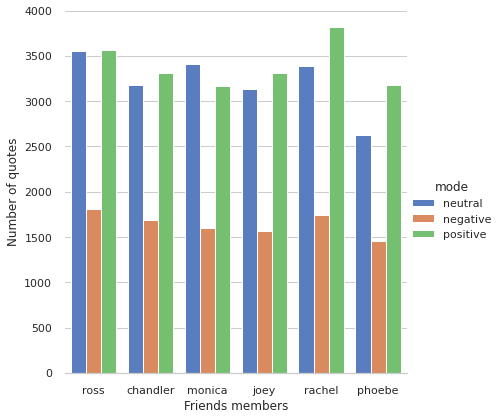

In [0]:
import seaborn as sns
sns.set(style="whitegrid")
# Draw a nested barplot to show survival for class and sex
g_plot = sns.catplot(x="author", y="count", hue="mode", data=pd.DataFrame(g_friendly_mode),
                height=6, kind="bar", palette=sns.color_palette("muted"))
g_plot.despine(left=True)
g_plot.set_xlabels("Friends members")
g_plot.set_ylabels("Number of quotes")

**Measured using the positive polarity [Mean Polarity> 0.1]:**

In [0]:
g_friendly_mode_pos = g_friendly_mode[g_friendly_mode['mode'] == 'positive']
g_friendly_mode_pos.sort('count', ascending = False)

Columns:
	author	str
	mode	str
	count	int

Rows: 6

Data:
+----------+----------+-------+
|  author  |   mode   | count |
+----------+----------+-------+
|  rachel  | positive |  3822 |
|   ross   | positive |  3564 |
|   joey   | positive |  3315 |
| chandler | positive |  3308 |
|  phoebe  | positive |  3175 |
|  monica  | positive |  3163 |
+----------+----------+-------+
[6 rows x 3 columns]

**Measured using the negative polarity [Mean Polarity< -0.1]:**

In [0]:
g_friendly_mode_neg = g_friendly_mode[g_friendly_mode['mode'] == 'negative']
g_friendly_mode_neg.sort('count', ascending = False)

Columns:
	author	str
	mode	str
	count	int

Rows: 6

Data:
+----------+----------+-------+
|  author  |   mode   | count |
+----------+----------+-------+
|   ross   | negative |  1806 |
|  rachel  | negative |  1746 |
| chandler | negative |  1692 |
|  monica  | negative |  1599 |
|   joey   | negative |  1565 |
|  phoebe  | negative |  1459 |
+----------+----------+-------+
[6 rows x 3 columns]

In [0]:
g_friendly_mode_pos_neg = g_friendly_mode_pos.join(g_friendly_mode_neg, on='author', how='inner')
g_friendly_mode_pos_neg['Total'] = g_friendly_mode_pos_neg['count'] - g_friendly_mode_pos_neg['count.1']
g_friendly_mode_pos_neg = g_friendly_mode_pos_neg.sort('Total', ascending = False)
g_friendly_mode_pos_neg

Columns:
	author	str
	mode	str
	count	int
	mode.1	str
	count.1	int
	Total	int

Rows: 6

Data:
+----------+----------+-------+----------+---------+-------+
|  author  |   mode   | count |  mode.1  | count.1 | Total |
+----------+----------+-------+----------+---------+-------+
|  rachel  | positive |  3822 | negative |   1746  |  2076 |
|   ross   | positive |  3564 | negative |   1806  |  1758 |
|   joey   | positive |  3315 | negative |   1565  |  1750 |
|  phoebe  | positive |  3175 | negative |   1459  |  1716 |
| chandler | positive |  3308 | negative |   1692  |  1616 |
|  monica  | positive |  3163 | negative |   1599  |  1564 |
+----------+----------+-------+----------+---------+-------+
[6 rows x 6 columns]

**The most friendly friend is Rachel, while Monica is the less friendly friend.**
The Y axis is the number of positive sentences (measured by the polarity > 0.1) of the character minus the number of negative sentences (measured by the polarity < -0.1) of the character.

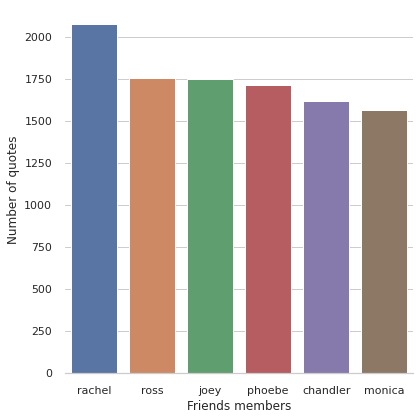

In [0]:
sns.set(style="whitegrid")
g_plot = sns.catplot(x="author", y="Total", data=pd.DataFrame(g_friendly_mode_pos_neg),
                height=6, kind="bar")
g_plot.despine(left=True)
g_plot.set_xlabels("Friends members")
g_plot.set_ylabels("Number of quotes")

3. *Construct a classifier that can be given several text lines (quotes) from a specific episode that will predict the episode's season number (20pt).*

**Create a copy for the sframe and convert season float to int.**

In [0]:
g_season_num = g.copy()[['author', 'episode_number', 'quote', 'quote_order', 'season']]
g_season_num['season'] = g_season_num['season'].apply(lambda x: int(x))
g_season_num

Columns:
	author	str
	episode_number	float
	quote	str
	quote_order	float
	season	int

Rows: 49506

Data:
+----------+----------------+-------------------------------+-------------+--------+
|  author  | episode_number |             quote             | quote_order | season |
+----------+----------------+-------------------------------+-------------+--------+
|  monica  |      1.0       | There's nothing to tell! H... |     0.0     |   1    |
|   joey   |      1.0       | C'mon, you're going out wi... |     1.0     |   1    |
| chandler |      1.0       | All right Joey, be nice. S... |     2.0     |   1    |
|  phoebe  |      1.0       |    Wait, does he eat chalk?   |     3.0     |   1    |
|  phoebe  |      1.0       | Just, 'cause, I don't want... |     4.0     |   1    |
|  monica  |      1.0       | Okay, everybody relax. Thi... |     5.0     |   1    |
| chandler |      1.0       |   Sounds like a date to me.   |     6.0     |   1    |
| chandler |      1.0       | Alright, so I'm back in hi... |     7.0     |   1    |
| chandler |      1.0       | Then I look down, and I re... |     9.0     |   1    |
|   joey   |      1.0       |         Instead of...?        |     10.0    |   1    |
+----------+----------------+-------------------------------+-------------+--------+
[49506 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

**Create a new df with episode number, season number and all the quotes in this episode.**

In [0]:
g_season_num_gb = g_season_num.groupby(['episode_number', 'season'], {"quote":agg.CONCAT("quote")})
g_season_num_gb

Columns:
	episode_number	float
	season	int
	quote	list

Rows: 225

Data:
+----------------+--------+-------------------------------+
| episode_number | season |             quote             |
+----------------+--------+-------------------------------+
|      10.0      |   9    | [...sprang to his sleigh, ... |
|      12.0      |   9    | [Hey, Hey. So where's Mon?... |
|      12.0      |   2    | [That commercial always ma... |
|      10.0      |   2    | [I'm excited! I've never g... |
|      11.0      |   7    | [Ohh. Mmm., (Comes in the ... |
|      20.0      |   7    | [Hey! Out of all of us, wh... |
|      6.0       |   7    | [Okay, the reason why I as... |
|      21.0      |   5    | [No. I think we learned th... |
|      22.0      |   6    | [(dejected) Hi, you guys.,... |
|      14.0      |   3    | [Wow! This girl is good., ... |
+----------------+--------+-------------------------------+
[225 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

You asked for "given several text lines", but it's not clear.
Solution: let's try with a different fraction of quotes per episode (selected randomly with a pre-defined seed '2020').

This solution also suggested by Michel.

In [0]:
import random
import numpy as np

random.seed(2020)

def get_random_quotes_per_episode(list_of_quotes, frac):
  list_len = len(list_of_quotes)
  choices_len = int(list_len * frac)
  return random.choices(list_of_quotes, k=choices_len)

starting_prob = 0.1
ending_prob = 1.01
jumping_prob = 0.1
list_of_probs = np.arange(starting_prob, ending_prob, jumping_prob)
for fc in list_of_probs:
  g_season_num_gb[f'quote_fc_{fc}'] = g_season_num_gb.apply(lambda x: get_random_quotes_per_episode(list_of_quotes=x['quote'],
                                                                                                    frac=fc))
g_season_num_gb

Columns:
	episode_number	float
	season	int
	quote	list
	quote_fc_0.1	list
	quote_fc_0.2	list
	quote_fc_0.30000000000000004	list
	quote_fc_0.4	list
	quote_fc_0.5	list
	quote_fc_0.6	list
	quote_fc_0.7000000000000001	list
	quote_fc_0.8	list
	quote_fc_0.9	list
	quote_fc_1.0	list

Rows: 225

Data:
+----------------+--------+-------------------------------+
| episode_number | season |             quote             |
+----------------+--------+-------------------------------+
|      10.0      |   9    | [...sprang to his sleigh, ... |
|      12.0      |   9    | [Hey, Hey. So where's Mon?... |
|      12.0      |   2    | [That commercial always ma... |
|      10.0      |   2    | [I'm excited! I've never g... |
|      11.0      |   7    | [Ohh. Mmm., (Comes in the ... |
|      20.0      |   7    | [Hey! Out of all of us, wh... |
|      6.0       |   7    | [Okay, the reason why I as... |
|      21.0      |   5    | [No. I think we learned th... |
|      22.0      |   6    | [(dejected) Hi, you guys.,... |
|      14.0      |   3    | [Wow! This girl is good., ... |
+----------------+--------+-------------------------------+
+-------------------------------+-------------------------------+
|          quote_fc_0.1         |          quote_fc_0.2         |
+-------------------------------+-------------------------------+
| [Right!, I think you're be... | [(to Monica) Here, pass th... |
| [No. (opens the box) wh - ... | [Shh!, (In a helium voice,... |
| [Good morning. Hey pal, lo... | [What're you gonna do?, Aa... |
| [[upset] She's dating. She... | [Good for you., I'm excite... |
| [Chandler, this is not add... | [Cousin Frannies wedding,... |
| [Hey!, An invitation for t... | [(looking around) You got ... |
| [Were now in the ceremony... | [Okay, so after this audit... |
| [Phoebe, are you okay?, No... | [Hey ladies! What are you ... |
| [(going over to him) Im s... | [Hey, and then lunch., Wha... |
| [I cant. I cant. She dum... | [Yeah., (entering) Hi!, Y'... |
+-------------------------------+-------------------------------+
+-------------------------------+-------------------------------+
|  quote_fc_0.30000000000000004 |          quote_fc_0.4         |
+-------------------------------+-------------------------------+
| [Sure you do., (realizing)... | [How drunk are you?, Y'kno... |
| [I'm afraid I can't let yo... | [Shhh don't say that loud,... |
| [She's comin'., Hey, stick... | [That commercial always ma... |
| [Well, I am going to, uh..... | [No, you let me fini..., I... |
| [Heres Frannie. Hmm, won... | [So I finally heard back f... |
| [Oh, wow thanks! (Reading ... | [Well yknow what they say... |
| [Im really not deciding!,... | [Okay! Okay! Umm, Webster... |
| [(entering) Hey guys!, (he... | [It's not! I'm defrosting ... |
| [No. No-no uh, he just, he... | [Dont feel too sorry for ... |
| [Nope, nope, Id just ah, ... | [Yeah, were gonna have to... |
+-------------------------------+-------------------------------+
+-------------------------------+-------------------------------+
|          quote_fc_0.5         |          quote_fc_0.6         |
+-------------------------------+-------------------------------+
| [I'm sorry. Hey, at least ... | [(smiling) Uh-huh., "Wendy... |
| [Mate? They're all brother... | [Well not so much a pet as... |
| [I'm going to the bathroom... | [No, my first fan mail., Y... |
| [With a man?, Well, I gues... | [[to Russ] For your inform... |
| [Im Monica Gellar. Who do... | [What are you talking abou... |
| [Hey. (Laughs then serious... | [What?!, Wow! What do you ... |
| [Still., (playing the drun... | [I\x85 I dont know what y... |
| [All right listen umm, I j... | [Umm, yeah! Today's., Hey ... |
| [Have you seen Chandler?!,... | [Rachel said that!, Thanks... |
| [Oh God, it freaked me out... | [Ive got some bad news., ... |
+-------------------------------+-------------------------------+
+-------------------------------+-------------------------------+
|  quote_fc_0.70000000000000

Create a sFrame for each fraction

In [0]:
def update_dict_per_ep(dict_df, season, quotes):
  dict_df['quotes'].append(' '.join(quotes))
  dict_df['season'].append(season)
df_season = g_season_num_gb.to_dataframe()
models_fc = {}
for fc in list_of_probs:
  dict_df = {'quotes': [], 'season': []}
  g_season_num_gb.to_dataframe()
  for x in df_season.iterrows():
    update_dict_per_ep(dict_df=dict_df,
                       season=x[1]['season'],
                       quotes=x[1][f'quote_fc_{fc}'])
  models_fc[fc] = tc.SFrame(dict_df)

models_fc[list_of_probs[0]]

Columns:
	quotes	str
	season	int

Rows: 225

Data:
+-------------------------------+--------+
|             quotes            | season |
+-------------------------------+--------+
| Right! I think you're bett... |   9    |
| No. (opens the box) wh - g... |   9    |
| Good morning. Hey pal, loo... |   2    |
| [upset] She's dating. She'... |   2    |
| Chandler, this is not addr... |   7    |
| Hey! An invitation for the... |   7    |
| Were now in the ceremony,... |   7    |
| Phoebe, are you okay? No M... |   5    |
| (going over to him) Im so... |   6    |
| I cant. I cant. She dump... |   3    |
+-------------------------------+--------+
[225 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

Create feature matrix for each fraction

In [0]:
from afinn import Afinn
from textblob import TextBlob

for fc in list_of_probs:
  afinn = Afinn()
  main_feature_name = 'quotes'
  g_new = models_fc[fc]
  g_new[f'{main_feature_name} Words'] = tc.text_analytics.count_words(g_new[main_feature_name])
  g_new[f'{main_feature_name} Words WSW'] = g_new[f'{main_feature_name} Words'].dict_trim_by_keys(tc.text_analytics.stop_words(lang='en'), exclude=True)
  g_new[f'{main_feature_name} 1 gram'] = tc.text_analytics.count_ngrams(g_new[main_feature_name], n=1, method='word')
  g_new[f'{main_feature_name} 2 grams'] = tc.text_analytics.count_ngrams(g_new[main_feature_name], n=2, method='word')
  g_new[f'{main_feature_name} 3 grams'] = tc.text_analytics.count_ngrams(g_new[main_feature_name], n=3, method='word')
  g_new[f'{main_feature_name} TF-IDF'] = tc.text_analytics.tf_idf(g_new[main_feature_name])
  g_new[f'{main_feature_name} Afinn'] = g_new[main_feature_name].apply(lambda t: afinn.score(t))
  g_new[f'{main_feature_name} TextBlob Polarity'] = g_new[main_feature_name].apply(lambda review: TextBlob(review).sentiment.polarity)
  g_new[f'{main_feature_name} TextBlob Subjectivity'] = g_new[main_feature_name].apply(lambda review: TextBlob(review).sentiment.subjectivity)

  features = [
              f'{main_feature_name} Words',
              f'{main_feature_name} Words WSW',
              f'{main_feature_name} 1 gram',
              f'{main_feature_name} 2 grams',
              f'{main_feature_name} 3 grams',
              f'{main_feature_name} TF-IDF',
              f'{main_feature_name} Afinn',
              f'{main_feature_name} TextBlob Polarity',
              f'{main_feature_name} TextBlob Subjectivity',
              'All'
              ]
  g_new.materialize()
  models_fc[fc] = g_new

models_fc[list_of_probs[0]]

Columns:
	quotes	str
	season	int
	quotes Words	dict
	quotes Words WSW	dict
	quotes 1 gram	dict
	quotes 2 grams	dict
	quotes 3 grams	dict
	quotes TF-IDF	dict
	quotes Afinn	float
	quotes TextBlob Polarity	float
	quotes TextBlob Subjectivity	float

Rows: 225

Data:
+-------------------------------+--------+-------------------------------+
|             quotes            | season |          quotes Words         |
+-------------------------------+--------+-------------------------------+
| Right! I think you're bett... |   9    | {'they': 1.0, 'belly': 1.0... |
| No. (opens the box) wh - g... |   9    | {'had': 1.0, 'nanny': 1.0,... |
| Good morning. Hey pal, loo... |   2    | {'brown': 1.0, 'big': 1.0,... |
| [upset] She's dating. She'... |   2    | {'t': 1.0, 'wasn': 1.0, 'w... |
| Chandler, this is not addr... |   7    | {'leaves': 1.0, 'gonna': 1... |
| Hey! An invitation for the... |   7    | {'exploding': 1.0, 'head':... |
| Were now in the ceremony,... |   7    | {'gasps': 1.0, 'ridiculous... |
| Phoebe, are you okay? No M... |   5    | {'pumpkin': 1.0, 'sphinx':... |
| (going over to him) Im so... |   6    | {'go': 1.0, 'would': 1.0, ... |
| I cant. I cant. She dump... |   3    | {'have': 1.0, 'anymore': 1... |
+-------------------------------+--------+-------------------------------+
+-------------------------------+-------------------------------+
|        quotes Words WSW       |         quotes 1 gram         |
+-------------------------------+-------------------------------+
| {'belly': 1.0, 'bowl': 1.0... | {'quit': 1, 'they': 1, 'tu... |
| {'nanny': 1.0, 'man': 1.0,... | {'nanny': 1, 'hey': 1, 'co... |
| {'brown': 1.0, 'big': 1.0,... | {'monkeys': 1, 'fact': 1, ... |
| {'wasn': 1.0, 've': 1.0, '... | {'drinking': 1, 't': 1, 'w... |
| {'leaves': 1.0, 'gonna': 1... | {'see': 1, 'four': 1, 'he\... |
| {'exploding': 1.0, 'head':... | {'am': 1, 'try': 1, 'stand... |
| {'gasps': 1.0, 'ridiculous... | {'ridiculous\x97we\x92re':... |
| {'pumpkin': 1.0, 'sphinx':... | {'quality': 1, 'purebred':... |
| {'you\x97actually': 1.0, '... | {'go': 1, 'would': 1, 'you... |
| {'anymore': 1.0, 'working'... | {'still': 1, 'have': 1, 'w... |
+-------------------------------+-------------------------------+
+-------------------------------+-------------------------------+
|         quotes 2 grams        |         quotes 3 grams        |
+-------------------------------+-------------------------------+
| {'t fire': 1, 'out they': ... | {'because i quit': 1, 'fir... |
| {'nanny like': 1, 'wish i'... | {'a nanny like': 1, 'i had... |
| {'both monkeys': 1, 'they ... | {'re both monkeys': 1, 'th... |
| {'him when': 1, 'with him'... | {'when he wasn': 1, 'with ... |
| {'and leaves': 1, 'up and'... | {'up and leaves': 1, 'see ... |
| {'around batman': 1, 'expl... | {'is exploding you': 1, 'h... |
| {'in disgust': 1, 'and gru... | {'coin and grunts': 1, 'at... |
| {'doin pumpkin': 1, 'hiya ... | {'sphinx cat hiya': 1, 'qu... |
| {'go check': 1, 'i\x97woul... | {'check on that': 1, 'go c... |
| {'stuff with': 1, 'still d... | {'do stuff with': 1, 'to s... |
+-------------------------------+-------------------------------+
+-------------------------------+--------------+--------------------------+
|         quotes TF-IDF         | quotes Afinn | quotes TextBlob Polarity |
+-------------------------------+--------------+--------------------------+
| {'quit.': 4.72295322164447... |     13.0     |    0.2474646676852559    |
| {'you.': 1.072294980350736... |     21.0     |   0.15821428571428572    |
| {'monkeys.': 5.41610040220... |     10.0     |   0.07755102040816328    |
| {"wasn't": 2.7770430725891... |     0.0      |           0.0            |
| {'him!': 3.624340932976365... |     -5.0     |   0.050436783509700184   |
| {'head': 2.420368128650429... |     11.0     |   -0.11203124999999999   |
| {'disgust.)': 3.8066624897... |     16.0     |   0.17412613157242063    |
| {'pumpkin?': 5.41610040220... |     10.0     |   0.11589532749858837    |
| {

**Build a model per fraction and per feature (also for all the features together  - called All)**

In [0]:
import copy
models_per_fc = {}
test_per_fc = {}

for fc in list_of_probs:
  test, train  = models_fc[fc].random_split(0.2, seed=2020)
  test_per_fc[fc] = test
  models_per_fc[fc] = {}
  for f in features:
    if f == 'All':
      new_features = copy.deepcopy(features)
      train_features = list(set(new_features) - set(['All']))
      models_per_fc[fc][f] = tc.boosted_trees_classifier.create(train,features=train_features, target="season")
    else:
      models_per_fc[fc][f] = tc.boosted_trees_classifier.create(train,features=[f], target="season")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 4108

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.070750     | 1.000000          | 0.333333            | 1.559012          | 2.186826            |

| 2         | 0.133306     | 1.000000          | 0.555556            | 1.110409          | 1.986899            |

| 3         | 0.196926     | 1.000000          | 0.666667            | 0.824381          | 1.830920            |

| 4         | 0.262827     | 1.000000          | 0.666667            | 0.628338          | 1.719857            |

| 5         | 0.327516     | 1.000000          | 0.777778            | 0.487594          | 1.594276            |

| 10        | 0.640643     | 1.000000          | 0.666667            | 0.167630          | 1.381428            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 3769

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.052039     | 0.968944          | 0.222222            | 1.592557          | 2.377167            |

| 2         | 0.099997     | 0.987578          | 0.222222            | 1.174239          | 2.433393            |

| 3         | 0.149119     | 1.000000          | 0.000000            | 0.898687          | 2.432216            |

| 4         | 0.197819     | 1.000000          | 0.111111            | 0.702037          | 2.425975            |

| 5         | 0.246688     | 1.000000          | 0.111111            | 0.553514          | 2.403362            |

| 10        | 0.478660     | 1.000000          | 0.111111            | 0.209145          | 2.414856            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 4154

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.066724     | 0.987578          | 0.333333            | 1.513395          | 2.091644            |

| 2         | 0.125066     | 0.993789          | 0.444444            | 1.091344          | 1.961649            |

| 3         | 0.183367     | 1.000000          | 0.444444            | 0.813151          | 1.892080            |

| 4         | 0.241687     | 1.000000          | 0.444444            | 0.622365          | 1.825512            |

| 5         | 0.309875     | 1.000000          | 0.444444            | 0.482923          | 1.708612            |

| 10        | 0.584590     | 1.000000          | 0.444444            | 0.169082          | 1.506356            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 22627

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.147662     | 0.944099          | 0.222222            | 1.632014          | 2.219372            |

| 2         | 0.285902     | 0.993789          | 0.222222            | 1.196384          | 2.215471            |

| 3         | 0.421749     | 1.000000          | 0.222222            | 0.922724          | 2.210233            |

| 4         | 0.563200     | 1.000000          | 0.111111            | 0.716377          | 2.237505            |

| 5         | 0.701107     | 1.000000          | 0.222222            | 0.573186          | 2.227139            |

| 10        | 1.362107     | 1.000000          | 0.333333            | 0.219362          | 2.288616            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 36938

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.192658     | 0.888199          | 0.111111            | 1.838626          | 2.349589            |

| 2         | 0.380266     | 0.981366          | 0.111111            | 1.468215          | 2.355913            |

| 3         | 0.573113     | 0.993789          | 0.111111            | 1.184472          | 2.416750            |

| 4         | 0.761432     | 1.000000          | 0.222222            | 0.969022          | 2.412649            |

| 5         | 0.955297     | 1.000000          | 0.222222            | 0.804416          | 2.481869            |

| 10        | 1.855522     | 1.000000          | 0.111111            | 0.352594          | 2.740701            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 7297

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.085344     | 0.981366          | 0.000000            | 1.570473          | 2.317750            |

| 2         | 0.160394     | 1.000000          | 0.111111            | 1.129666          | 2.321944            |

| 3         | 0.242594     | 1.000000          | 0.222222            | 0.855330          | 2.284342            |

| 4         | 0.318293     | 1.000000          | 0.222222            | 0.658323          | 2.285830            |

| 5         | 0.393866     | 1.000000          | 0.222222            | 0.512821          | 2.354522            |

| 10        | 0.745781     | 1.000000          | 0.222222            | 0.183470          | 2.331992            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.013866     | 0.360248          | 0.000000            | 2.146099          | 2.346039            |

| 2         | 0.027121     | 0.372671          | 0.111111            | 2.025711          | 2.372807            |

| 3         | 0.035940     | 0.385093          | 0.111111            | 1.926923          | 2.420392            |

| 4         | 0.044359     | 0.397516          | 0.111111            | 1.847925          | 2.453183            |

| 5         | 0.052892     | 0.409938          | 0.111111            | 1.778304          | 2.513496            |

| 10        | 0.084264     | 0.409938          | 0.111111            | 1.572461          | 2.743595            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.010333     | 0.608696          | 0.222222            | 2.031777          | 2.286169            |

| 2         | 0.018608     | 0.664596          | 0.222222            | 1.828714          | 2.268908            |

| 3         | 0.031863     | 0.708075          | 0.222222            | 1.662552          | 2.309180            |

| 4         | 0.042049     | 0.714286          | 0.222222            | 1.516111          | 2.330719            |

| 5         | 0.049601     | 0.763975          | 0.222222            | 1.399002          | 2.361014            |

| 10        | 0.082077     | 0.888199          | 0.111111            | 1.007691          | 2.521386            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.016711     | 0.658385          | 0.000000            | 2.018496          | 2.351907            |

| 2         | 0.027861     | 0.670807          | 0.000000            | 1.791769          | 2.417840            |

| 3         | 0.035617     | 0.714286          | 0.000000            | 1.614736          | 2.475137            |

| 4         | 0.044832     | 0.763975          | 0.000000            | 1.471473          | 2.522802            |

| 5         | 0.052865     | 0.776398          | 0.000000            | 1.344687          | 2.582391            |

| 10        | 0.084982     | 0.881988          | 0.000000            | 0.944169          | 2.875861            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 79628

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.443387     | 0.981366          | 0.444444            | 1.541025          | 2.157096            |

| 2         | 0.891881     | 1.000000          | 0.444444            | 1.098128          | 2.092076            |

| 3         | 1.342326     | 1.000000          | 0.222222            | 0.820296          | 2.015640            |

| 4         | 1.813506     | 1.000000          | 0.222222            | 0.625351          | 1.949665            |

| 5         | 2.253725     | 1.000000          | 0.222222            | 0.482708          | 1.899094            |

| 10        | 4.403063     | 1.000000          | 0.111111            | 0.163009          | 1.815511            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 5969

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.089253     | 0.993789          | 0.333333            | 1.468484          | 2.097388            |

| 2         | 0.166890     | 1.000000          | 0.333333            | 1.048446          | 2.001422            |

| 3         | 0.246793     | 1.000000          | 0.333333            | 0.779744          | 1.902075            |

| 4         | 0.327513     | 1.000000          | 0.444444            | 0.592350          | 1.878933            |

| 5         | 0.411373     | 1.000000          | 0.444444            | 0.458073          | 1.796574            |

| 10        | 0.802761     | 1.000000          | 0.444444            | 0.152486          | 1.666347            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 5549

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.068671     | 1.000000          | 0.222222            | 1.556731          | 2.168562            |

| 2         | 0.135431     | 1.000000          | 0.333333            | 1.122580          | 2.074610            |

| 3         | 0.198381     | 1.000000          | 0.444444            | 0.847488          | 1.982808            |

| 4         | 0.260096     | 1.000000          | 0.444444            | 0.653782          | 1.967569            |

| 5         | 0.322892     | 1.000000          | 0.444444            | 0.512877          | 1.870104            |

| 10        | 0.636369     | 1.000000          | 0.555556            | 0.179057          | 1.752786            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 5959

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.087615     | 1.000000          | 0.111111            | 1.484254          | 2.262767            |

| 2         | 0.177415     | 1.000000          | 0.333333            | 1.055320          | 2.027579            |

| 3         | 0.259677     | 1.000000          | 0.222222            | 0.784274          | 1.980429            |

| 4         | 0.342773     | 1.000000          | 0.333333            | 0.594968          | 1.968542            |

| 5         | 0.427861     | 1.000000          | 0.333333            | 0.457868          | 1.937358            |

| 10        | 0.831553     | 1.000000          | 0.333333            | 0.152010          | 1.934486            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 38402

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.253965     | 1.000000          | 0.222222            | 1.519388          | 2.224442            |

| 2         | 0.507774     | 1.000000          | 0.333333            | 1.096858          | 2.242325            |

| 3         | 0.738758     | 1.000000          | 0.333333            | 0.822547          | 2.242362            |

| 4         | 0.986781     | 1.000000          | 0.111111            | 0.628176          | 2.198525            |

| 5         | 1.227050     | 1.000000          | 0.222222            | 0.492463          | 2.243133            |

| 10        | 2.360694     | 1.000000          | 0.111111            | 0.174311          | 2.420353            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 68152

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.343242     | 0.962733          | 0.111111            | 1.680069          | 2.227003            |

| 2         | 0.686742     | 0.987578          | 0.111111            | 1.301606          | 2.274075            |

| 3         | 1.033712     | 0.993789          | 0.111111            | 1.009483          | 2.213054            |

| 4         | 1.361732     | 1.000000          | 0.111111            | 0.818373          | 2.197284            |

| 5         | 1.698830     | 1.000000          | 0.111111            | 0.668014          | 2.194780            |

| 10        | 3.295036     | 1.000000          | 0.222222            | 0.268351          | 2.188643            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 11225

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.121323     | 1.000000          | 0.333333            | 1.527774          | 2.074047            |

| 2         | 0.223266     | 1.000000          | 0.333333            | 1.090358          | 1.845986            |

| 3         | 0.327286     | 1.000000          | 0.333333            | 0.812028          | 1.750148            |

| 4         | 0.437719     | 1.000000          | 0.555556            | 0.616383          | 1.661187            |

| 5         | 0.543289     | 1.000000          | 0.555556            | 0.477004          | 1.628875            |

| 10        | 1.071128     | 1.000000          | 0.555556            | 0.159739          | 1.511015            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.018777     | 0.422360          | 0.111111            | 2.112621          | 2.312870            |

| 2         | 0.027294     | 0.465838          | 0.111111            | 1.960835          | 2.326259            |

| 3         | 0.035134     | 0.478261          | 0.111111            | 1.837632          | 2.353393            |

| 4         | 0.042564     | 0.484472          | 0.111111            | 1.744082          | 2.387737            |

| 5         | 0.051152     | 0.484472          | 0.111111            | 1.665788          | 2.430611            |

| 10        | 0.082615     | 0.509317          | 0.111111            | 1.411465          | 2.652448            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.018951     | 0.608696          | 0.000000            | 2.036958          | 2.285033            |

| 2         | 0.034353     | 0.658385          | 0.111111            | 1.815092          | 2.264072            |

| 3         | 0.043162     | 0.701863          | 0.222222            | 1.644782          | 2.275133            |

| 4         | 0.050895     | 0.732919          | 0.222222            | 1.500470          | 2.264833            |

| 5         | 0.060028     | 0.757764          | 0.222222            | 1.378262          | 2.273950            |

| 10        | 0.095245     | 0.850932          | 0.333333            | 0.995798          | 2.404865            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.010969     | 0.596273          | 0.000000            | 2.034247          | 2.307225            |

| 2         | 0.022365     | 0.652174          | 0.000000            | 1.825242          | 2.327182            |

| 3         | 0.035449     | 0.677019          | 0.000000            | 1.657042          | 2.414588            |

| 4         | 0.045401     | 0.689441          | 0.000000            | 1.507250          | 2.444942            |

| 5         | 0.054664     | 0.757764          | 0.000000            | 1.385563          | 2.504558            |

| 10        | 0.091722     | 0.881988          | 0.000000            | 0.980406          | 2.798511            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 135144

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.763442     | 1.000000          | 0.222222            | 1.487688          | 2.269980            |

| 2         | 1.515063     | 1.000000          | 0.222222            | 1.053582          | 2.361431            |

| 3         | 2.262967     | 1.000000          | 0.222222            | 0.777895          | 2.367536            |

| 4         | 3.020915     | 1.000000          | 0.222222            | 0.585837          | 2.341874            |

| 5         | 3.771646     | 1.000000          | 0.222222            | 0.448597          | 2.272384            |

| 10        | 7.280180     | 1.000000          | 0.222222            | 0.145612          | 2.185875            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 7022

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.099834     | 1.000000          | 0.333333            | 1.489910          | 2.056583            |

| 2         | 0.195289     | 1.000000          | 0.222222            | 1.058344          | 1.889862            |

| 3         | 0.290455     | 1.000000          | 0.333333            | 0.786642          | 1.868744            |

| 4         | 0.387021     | 1.000000          | 0.333333            | 0.597677          | 1.807068            |

| 5         | 0.493777     | 1.000000          | 0.333333            | 0.460375          | 1.748064            |

| 10        | 0.974910     | 1.000000          | 0.333333            | 0.151047          | 1.610586            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 6654

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.100748     | 0.993789          | 0.222222            | 1.522266          | 2.164770            |

| 2         | 0.177823     | 1.000000          | 0.333333            | 1.097130          | 2.010652            |

| 3         | 0.253803     | 1.000000          | 0.333333            | 0.823400          | 1.951454            |

| 4         | 0.329278     | 1.000000          | 0.333333            | 0.631508          | 1.981286            |

| 5         | 0.402929     | 1.000000          | 0.444444            | 0.489766          | 1.926809            |

| 10        | 0.771399     | 1.000000          | 0.444444            | 0.169321          | 1.910983            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 7060

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.101753     | 1.000000          | 0.555556            | 1.484769          | 2.001184            |

| 2         | 0.204171     | 1.000000          | 0.666667            | 1.055086          | 1.856067            |

| 3         | 0.301931     | 1.000000          | 0.666667            | 0.781977          | 1.755137            |

| 4         | 0.398880     | 1.000000          | 0.666667            | 0.591398          | 1.712717            |

| 5         | 0.500075     | 1.000000          | 0.777778            | 0.457179          | 1.658232            |

| 10        | 0.984291     | 1.000000          | 0.555556            | 0.149937          | 1.469593            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 50452

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.308976     | 0.993789          | 0.333333            | 1.531271          | 2.269969            |

| 2         | 0.619633     | 0.993789          | 0.222222            | 1.091068          | 2.362107            |

| 3         | 0.917125     | 1.000000          | 0.222222            | 0.810360          | 2.464213            |

| 4         | 1.216290     | 1.000000          | 0.222222            | 0.619156          | 2.434168            |

| 5         | 1.521868     | 1.000000          | 0.222222            | 0.480764          | 2.485640            |

| 10        | 3.001968     | 1.000000          | 0.222222            | 0.161689          | 2.873958            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 94052

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.474708     | 0.987578          | 0.111111            | 1.621288          | 2.332059            |

| 2         | 0.923367     | 1.000000          | 0.000000            | 1.225661          | 2.435071            |

| 3         | 1.392013     | 1.000000          | 0.111111            | 0.942859          | 2.421033            |

| 4         | 1.850037     | 1.000000          | 0.111111            | 0.751579          | 2.485131            |

| 5         | 2.318236     | 1.000000          | 0.111111            | 0.599703          | 2.497258            |

| 10        | 4.514488     | 1.000000          | 0.222222            | 0.228244          | 2.546984            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 13754

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.144150     | 1.000000          | 0.555556            | 1.541578          | 2.047579            |

| 2         | 0.271936     | 1.000000          | 0.333333            | 1.085474          | 1.962518            |

| 3         | 0.408723     | 1.000000          | 0.222222            | 0.800114          | 1.945549            |

| 4         | 0.539982     | 1.000000          | 0.333333            | 0.604716          | 1.913952            |

| 5         | 0.670185     | 1.000000          | 0.444444            | 0.465819          | 1.854552            |

| 10        | 1.318686     | 1.000000          | 0.444444            | 0.152126          | 1.739403            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.013624     | 0.447205          | 0.000000            | 2.097141          | 2.315627            |

| 2         | 0.027385     | 0.459627          | 0.000000            | 1.933887          | 2.355366            |

| 3         | 0.038421     | 0.478261          | 0.111111            | 1.806997          | 2.387877            |

| 4         | 0.047613     | 0.490683          | 0.000000            | 1.704021          | 2.447568            |

| 5         | 0.056563     | 0.503106          | 0.111111            | 1.620093          | 2.506083            |

| 10        | 0.089266     | 0.527950          | 0.111111            | 1.358955          | 2.824653            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.012486     | 0.559006          | 0.222222            | 2.082024          | 2.233966            |

| 2         | 0.024897     | 0.590062          | 0.222222            | 1.900066          | 2.208697            |

| 3         | 0.036455     | 0.670807          | 0.222222            | 1.756097          | 2.185985            |

| 4         | 0.045674     | 0.645963          | 0.222222            | 1.639209          | 2.199358            |

| 5         | 0.060206     | 0.683230          | 0.222222            | 1.534287          | 2.196840            |

| 10        | 0.091577     | 0.826087          | 0.222222            | 1.160793          | 2.293763            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.019900     | 0.565217          | 0.111111            | 2.025344          | 2.332623            |

| 2         | 0.034682     | 0.664596          | 0.111111            | 1.798384          | 2.389847            |

| 3         | 0.044802     | 0.683230          | 0.000000            | 1.625032          | 2.489377            |

| 4         | 0.054071     | 0.708075          | 0.000000            | 1.478935          | 2.602136            |

| 5         | 0.060658     | 0.757764          | 0.000000            | 1.355160          | 2.698009            |

| 10        | 0.095898     | 0.869565          | 0.000000            | 0.973840          | 3.060082            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 179947

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.991283     | 1.000000          | 0.111111            | 1.520168          | 2.164865            |

| 2         | 1.979837     | 1.000000          | 0.333333            | 1.064843          | 2.102346            |

| 3         | 3.000171     | 1.000000          | 0.222222            | 0.780104          | 2.154890            |

| 4         | 4.053127     | 1.000000          | 0.222222            | 0.584455          | 2.231604            |

| 5         | 5.084113     | 1.000000          | 0.222222            | 0.446654          | 2.289750            |

| 10        | 10.064103    | 1.000000          | 0.111111            | 0.141645          | 2.489401            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 7995

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.116272     | 1.000000          | 0.555556            | 1.442457          | 2.070169            |

| 2         | 0.218938     | 1.000000          | 0.444444            | 1.030798          | 1.890869            |

| 3         | 0.328951     | 1.000000          | 0.444444            | 0.760491          | 1.887916            |

| 4         | 0.443321     | 1.000000          | 0.444444            | 0.574857          | 1.849649            |

| 5         | 0.549770     | 1.000000          | 0.444444            | 0.441700          | 1.791234            |

| 10        | 1.069610     | 1.000000          | 0.444444            | 0.143001          | 1.700604            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 7638

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.089777     | 0.993789          | 0.333333            | 1.447322          | 2.052809            |

| 2         | 0.172489     | 1.000000          | 0.333333            | 1.031683          | 2.028218            |

| 3         | 0.254751     | 1.000000          | 0.333333            | 0.769668          | 1.961042            |

| 4         | 0.341760     | 1.000000          | 0.333333            | 0.584713          | 1.900645            |

| 5         | 0.426452     | 1.000000          | 0.333333            | 0.453837          | 1.860668            |

| 10        | 0.846126     | 1.000000          | 0.444444            | 0.152617          | 1.741241            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 8068

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.105858     | 1.000000          | 0.444444            | 1.458652          | 1.980768            |

| 2         | 0.209025     | 1.000000          | 0.555556            | 1.036584          | 1.697047            |

| 3         | 0.314065     | 1.000000          | 0.555556            | 0.764887          | 1.551801            |

| 4         | 0.427290     | 1.000000          | 0.555556            | 0.575993          | 1.551776            |

| 5         | 0.538844     | 1.000000          | 0.666667            | 0.441839          | 1.522738            |

| 10        | 1.080436     | 1.000000          | 0.333333            | 0.142109          | 1.501511            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 61716

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.375341     | 0.987578          | 0.111111            | 1.502902          | 2.423221            |

| 2         | 0.752079     | 1.000000          | 0.111111            | 1.065503          | 2.527248            |

| 3         | 1.118219     | 1.000000          | 0.111111            | 0.787655          | 2.546764            |

| 4         | 1.487184     | 1.000000          | 0.111111            | 0.599155          | 2.512238            |

| 5         | 1.855201     | 1.000000          | 0.111111            | 0.463467          | 2.497816            |

| 10        | 3.580339     | 1.000000          | 0.000000            | 0.154524          | 2.512872            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 119900

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.613870     | 0.987578          | 0.333333            | 1.594434          | 2.205512            |

| 2         | 1.213127     | 1.000000          | 0.222222            | 1.179948          | 2.022109            |

| 3         | 1.825557     | 1.000000          | 0.222222            | 0.899747          | 1.929309            |

| 4         | 2.431456     | 1.000000          | 0.111111            | 0.705964          | 1.897210            |

| 5         | 3.035714     | 1.000000          | 0.111111            | 0.558376          | 1.883432            |

| 10        | 5.862188     | 1.000000          | 0.111111            | 0.205143          | 1.885037            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 16319

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.159789     | 1.000000          | 0.222222            | 1.449602          | 2.122235            |

| 2         | 0.302428     | 1.000000          | 0.222222            | 1.034175          | 2.189094            |

| 3         | 0.450533     | 1.000000          | 0.222222            | 0.765182          | 2.262188            |

| 4         | 0.602928     | 1.000000          | 0.222222            | 0.581509          | 2.315024            |

| 5         | 0.750226     | 1.000000          | 0.222222            | 0.447539          | 2.319417            |

| 10        | 1.479834     | 1.000000          | 0.111111            | 0.144608          | 2.500527            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.017938     | 0.434783          | 0.111111            | 2.080748          | 2.287446            |

| 2         | 0.032449     | 0.509317          | 0.111111            | 1.902907          | 2.282025            |

| 3         | 0.045726     | 0.515528          | 0.111111            | 1.759109          | 2.291626            |

| 4         | 0.053586     | 0.540373          | 0.000000            | 1.646246          | 2.310862            |

| 5         | 0.063526     | 0.546584          | 0.000000            | 1.554885          | 2.332330            |

| 10        | 0.106616     | 0.571429          | 0.000000            | 1.259760          | 2.528618            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.016564     | 0.546584          | 0.333333            | 2.067040          | 2.225936            |

| 2         | 0.032228     | 0.583851          | 0.333333            | 1.874188          | 2.210618            |

| 3         | 0.042518     | 0.633540          | 0.222222            | 1.708407          | 2.190523            |

| 4         | 0.051184     | 0.689441          | 0.222222            | 1.564901          | 2.194419            |

| 5         | 0.060286     | 0.757764          | 0.333333            | 1.453526          | 2.190827            |

| 10        | 0.090595     | 0.875776          | 0.333333            | 1.077842          | 2.232446            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.007220     | 0.633540          | 0.111111            | 2.035871          | 2.343244            |

| 2         | 0.018270     | 0.664596          | 0.111111            | 1.829896          | 2.390274            |

| 3         | 0.033236     | 0.695652          | 0.111111            | 1.670884          | 2.432084            |

| 4         | 0.045345     | 0.720497          | 0.111111            | 1.533490          | 2.472728            |

| 5         | 0.054320     | 0.751553          | 0.111111            | 1.419387          | 2.505875            |

| 10        | 0.089875     | 0.881988          | 0.111111            | 1.002472          | 2.714196            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 223079

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.151073     | 1.000000          | 0.444444            | 1.415137          | 2.009380            |

| 2         | 2.407998     | 1.000000          | 0.444444            | 0.992239          | 1.883310            |

| 3         | 3.679848     | 1.000000          | 0.444444            | 0.730537          | 1.743444            |

| 4         | 4.998499     | 1.000000          | 0.444444            | 0.549896          | 1.632076            |

| 5         | 6.247546     | 1.000000          | 0.444444            | 0.419969          | 1.614511            |

| 10        | 12.506220    | 1.000000          | 0.444444            | 0.132658          | 1.513240            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 8935

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.122590     | 1.000000          | 0.222222            | 1.476278          | 2.264605            |

| 2         | 0.238531     | 1.000000          | 0.000000            | 1.046353          | 2.183040            |

| 3         | 0.356378     | 1.000000          | 0.000000            | 0.776479          | 2.119734            |

| 4         | 0.485046     | 1.000000          | 0.000000            | 0.587423          | 2.151066            |

| 5         | 0.608118     | 1.000000          | 0.000000            | 0.450733          | 2.136235            |

| 10        | 1.195531     | 1.000000          | 0.000000            | 0.145885          | 2.150953            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 8509

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.105249     | 1.000000          | 0.444444            | 1.493899          | 1.944664            |

| 2         | 0.199465     | 1.000000          | 0.555556            | 1.066075          | 1.800171            |

| 3         | 0.295459     | 1.000000          | 0.555556            | 0.787728          | 1.741714            |

| 4         | 0.393541     | 1.000000          | 0.555556            | 0.596528          | 1.730299            |

| 5         | 0.495958     | 1.000000          | 0.444444            | 0.460246          | 1.716179            |

| 10        | 0.962043     | 1.000000          | 0.444444            | 0.152137          | 1.770763            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 8916

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.128183     | 1.000000          | 0.333333            | 1.467054          | 2.101135            |

| 2         | 0.244065     | 1.000000          | 0.333333            | 1.040196          | 1.975553            |

| 3         | 0.363105     | 1.000000          | 0.333333            | 0.767267          | 1.935722            |

| 4         | 0.487095     | 1.000000          | 0.333333            | 0.578372          | 2.007982            |

| 5         | 0.619674     | 1.000000          | 0.333333            | 0.444339          | 2.006700            |

| 10        | 1.212704     | 1.000000          | 0.444444            | 0.142903          | 2.015383            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 71013

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.429490     | 1.000000          | 0.111111            | 1.499034          | 2.266368            |

| 2         | 0.846958     | 1.000000          | 0.111111            | 1.056121          | 2.176259            |

| 3         | 1.271118     | 1.000000          | 0.222222            | 0.780089          | 2.066075            |

| 4         | 1.732162     | 1.000000          | 0.222222            | 0.591975          | 2.009559            |

| 5         | 2.165177     | 1.000000          | 0.111111            | 0.456413          | 1.990224            |

| 10        | 4.187131     | 1.000000          | 0.111111            | 0.152599          | 1.903052            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 141874

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.671917     | 0.993789          | 0.000000            | 1.557883          | 2.332213            |

| 2         | 1.344951     | 1.000000          | 0.111111            | 1.153368          | 2.354575            |

| 3         | 2.026652     | 1.000000          | 0.111111            | 0.880339          | 2.419210            |

| 4         | 2.735645     | 1.000000          | 0.111111            | 0.677011          | 2.570485            |

| 5         | 3.433707     | 1.000000          | 0.111111            | 0.540631          | 2.640478            |

| 10        | 6.764873     | 1.000000          | 0.111111            | 0.192155          | 3.038820            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 18406

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.179279     | 1.000000          | 0.333333            | 1.488044          | 2.037601            |

| 2         | 0.345865     | 1.000000          | 0.444444            | 1.050976          | 1.706215            |

| 3         | 0.523670     | 1.000000          | 0.555556            | 0.773774          | 1.525789            |

| 4         | 0.694427     | 1.000000          | 0.666667            | 0.582804          | 1.377920            |

| 5         | 0.872187     | 1.000000          | 0.555556            | 0.446384          | 1.360448            |

| 10        | 1.701752     | 1.000000          | 0.555556            | 0.142273          | 1.368665            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.013108     | 0.453416          | 0.000000            | 2.056466          | 2.404209            |

| 2         | 0.023358     | 0.540373          | 0.000000            | 1.867510          | 2.448895            |

| 3         | 0.033023     | 0.565217          | 0.000000            | 1.717639          | 2.538753            |

| 4         | 0.040542     | 0.577640          | 0.000000            | 1.595771          | 2.621893            |

| 5         | 0.049487     | 0.590062          | 0.000000            | 1.496940          | 2.710853            |

| 10        | 0.081936     | 0.627329          | 0.000000            | 1.201040          | 3.135580            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.014031     | 0.552795          | 0.222222            | 2.042249          | 2.256719            |

| 2         | 0.024579     | 0.614907          | 0.222222            | 1.832039          | 2.230971            |

| 3         | 0.030988     | 0.652174          | 0.222222            | 1.657903          | 2.249782            |

| 4         | 0.039853     | 0.739130          | 0.111111            | 1.513515          | 2.259413            |

| 5         | 0.048819     | 0.751553          | 0.111111            | 1.386154          | 2.283656            |

| 10        | 0.083792     | 0.869565          | 0.111111            | 0.991262          | 2.392597            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.015244     | 0.602484          | 0.111111            | 2.038946          | 2.347968            |

| 2         | 0.024227     | 0.720497          | 0.111111            | 1.821750          | 2.423462            |

| 3         | 0.033514     | 0.757764          | 0.000000            | 1.648313          | 2.505879            |

| 4         | 0.043077     | 0.745342          | 0.000000            | 1.511368          | 2.577140            |

| 5         | 0.052168     | 0.795031          | 0.000000            | 1.388665          | 2.675771            |

| 10        | 0.085418     | 0.857143          | 0.000000            | 1.023875          | 2.972854            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 258758

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.491505     | 1.000000          | 0.555556            | 1.481754          | 1.920470            |

| 2         | 2.985986     | 1.000000          | 0.444444            | 1.042453          | 1.760621            |

| 3         | 4.501694     | 1.000000          | 0.444444            | 0.763314          | 1.573921            |

| 4         | 6.034486     | 1.000000          | 0.555556            | 0.572632          | 1.478575            |

| 5         | 7.563948     | 1.000000          | 0.555556            | 0.436817          | 1.398177            |

| 10        | 15.145811    | 1.000000          | 0.444444            | 0.138212          | 1.272907            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 9433

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.128539     | 1.000000          | 0.111111            | 1.452965          | 2.286860            |

| 2         | 0.257793     | 1.000000          | 0.222222            | 1.024435          | 2.235127            |

| 3         | 0.384470     | 1.000000          | 0.222222            | 0.756990          | 2.153784            |

| 4         | 0.512949     | 1.000000          | 0.111111            | 0.571204          | 2.231120            |

| 5         | 0.637902     | 1.000000          | 0.111111            | 0.438342          | 2.256474            |

| 10        | 1.248644     | 1.000000          | 0.111111            | 0.141081          | 2.287241            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 8941

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.110992     | 1.000000          | 0.555556            | 1.498555          | 1.937816            |

| 2         | 0.213025     | 1.000000          | 0.555556            | 1.060485          | 1.707382            |

| 3         | 0.315857     | 1.000000          | 0.555556            | 0.786558          | 1.621411            |

| 4         | 0.418702     | 1.000000          | 0.555556            | 0.597468          | 1.531253            |

| 5         | 0.523536     | 1.000000          | 0.555556            | 0.460159          | 1.469489            |

| 10        | 1.024209     | 1.000000          | 0.666667            | 0.151721          | 1.290106            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 9465

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.139231     | 1.000000          | 0.555556            | 1.472825          | 2.020286            |

| 2         | 0.277642     | 1.000000          | 0.555556            | 1.036211          | 1.736793            |

| 3         | 0.409296     | 1.000000          | 0.555556            | 0.765829          | 1.649593            |

| 4         | 0.543287     | 1.000000          | 0.444444            | 0.579223          | 1.617737            |

| 5         | 0.674697     | 1.000000          | 0.555556            | 0.445180          | 1.612728            |

| 10        | 1.294899     | 1.000000          | 0.555556            | 0.142722          | 1.581789            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 78777

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.447805     | 1.000000          | 0.111111            | 1.491089          | 2.384892            |

| 2         | 0.900647     | 1.000000          | 0.111111            | 1.058765          | 2.358304            |

| 3         | 1.350870     | 1.000000          | 0.222222            | 0.783690          | 2.320736            |

| 4         | 1.822731     | 1.000000          | 0.222222            | 0.593237          | 2.407277            |

| 5         | 2.276855     | 1.000000          | 0.222222            | 0.455362          | 2.350864            |

| 10        | 4.536840     | 1.000000          | 0.222222            | 0.148861          | 2.345686            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 161163

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.798863     | 0.944099          | 0.222222            | 1.613333          | 2.343479            |

| 2         | 1.590259     | 1.000000          | 0.111111            | 1.182738          | 2.357034            |

| 3         | 2.399152     | 1.000000          | 0.111111            | 0.885797          | 2.305168            |

| 4         | 3.225695     | 1.000000          | 0.111111            | 0.690062          | 2.265347            |

| 5         | 4.032300     | 1.000000          | 0.111111            | 0.546010          | 2.214415            |

| 10        | 8.025181     | 1.000000          | 0.333333            | 0.198449          | 2.201076            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 19710

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.177263     | 1.000000          | 0.222222            | 1.479535          | 2.188669            |

| 2         | 0.355668     | 1.000000          | 0.333333            | 1.046254          | 2.177357            |

| 3         | 0.538768     | 1.000000          | 0.222222            | 0.772558          | 2.176438            |

| 4         | 0.721672     | 1.000000          | 0.111111            | 0.583021          | 2.160860            |

| 5         | 0.905904     | 1.000000          | 0.111111            | 0.446859          | 2.203398            |

| 10        | 1.799936     | 1.000000          | 0.111111            | 0.142557          | 2.258483            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.013511     | 0.509317          | 0.111111            | 2.083331          | 2.309157            |

| 2         | 0.022213     | 0.552795          | 0.111111            | 1.898604          | 2.374538            |

| 3         | 0.036809     | 0.565217          | 0.111111            | 1.748480          | 2.376620            |

| 4         | 0.045858     | 0.583851          | 0.111111            | 1.630966          | 2.400973            |

| 5         | 0.054748     | 0.583851          | 0.111111            | 1.527834          | 2.446716            |

| 10        | 0.087289     | 0.664596          | 0.111111            | 1.183324          | 2.700818            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.015081     | 0.571429          | 0.000000            | 2.036577          | 2.380807            |

| 2         | 0.021766     | 0.670807          | 0.000000            | 1.825525          | 2.478579            |

| 3         | 0.028248     | 0.714286          | 0.000000            | 1.658114          | 2.527781            |

| 4         | 0.037665     | 0.751553          | 0.000000            | 1.511082          | 2.612533            |

| 5         | 0.046363     | 0.776398          | 0.000000            | 1.398221          | 2.667263            |

| 10        | 0.080579     | 0.875776          | 0.000000            | 0.999376          | 3.009099            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.006034     | 0.577640          | 0.000000            | 2.043762          | 2.323121            |

| 2         | 0.015310     | 0.639752          | 0.111111            | 1.845959          | 2.358870            |

| 3         | 0.025605     | 0.670807          | 0.111111            | 1.683517          | 2.397555            |

| 4         | 0.035795     | 0.720497          | 0.111111            | 1.557083          | 2.448232            |

| 5         | 0.044184     | 0.714286          | 0.111111            | 1.448600          | 2.498805            |

| 10        | 0.076205     | 0.819876          | 0.111111            | 1.105445          | 2.713883            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 289117

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.613044     | 1.000000          | 0.444444            | 1.437096          | 2.087482            |

| 2         | 3.266124     | 1.000000          | 0.333333            | 1.016199          | 2.075945            |

| 3         | 4.948245     | 1.000000          | 0.222222            | 0.745428          | 2.014583            |

| 4         | 6.679569     | 1.000000          | 0.222222            | 0.559638          | 1.960423            |

| 5         | 8.456488     | 1.000000          | 0.333333            | 0.426997          | 1.851480            |

| 10        | 17.185085    | 1.000000          | 0.333333            | 0.133382          | 1.883037            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10025

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.129449     | 1.000000          | 0.555556            | 1.409986          | 1.922787            |

| 2         | 0.251098     | 1.000000          | 0.666667            | 0.996654          | 1.712735            |

| 3         | 0.378042     | 1.000000          | 0.555556            | 0.733135          | 1.520215            |

| 4         | 0.507011     | 1.000000          | 0.555556            | 0.553144          | 1.420062            |

| 5         | 0.632179     | 1.000000          | 0.555556            | 0.424572          | 1.325243            |

| 10        | 1.261001     | 1.000000          | 0.555556            | 0.135582          | 1.095121            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 9618

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.111995     | 1.000000          | 0.444444            | 1.457661          | 2.145576            |

| 2         | 0.216206     | 1.000000          | 0.666667            | 1.027729          | 1.837185            |

| 3         | 0.322586     | 1.000000          | 0.666667            | 0.758878          | 1.669455            |

| 4         | 0.430078     | 1.000000          | 0.666667            | 0.572758          | 1.527193            |

| 5         | 0.536331     | 1.000000          | 0.666667            | 0.439146          | 1.423949            |

| 10        | 1.051156     | 1.000000          | 0.555556            | 0.140990          | 1.232279            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10013

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.135389     | 1.000000          | 0.777778            | 1.435964          | 1.694787            |

| 2         | 0.261686     | 1.000000          | 0.666667            | 1.013635          | 1.459218            |

| 3         | 0.390019     | 1.000000          | 0.666667            | 0.743639          | 1.327720            |

| 4         | 0.522170     | 1.000000          | 0.666667            | 0.560066          | 1.213409            |

| 5         | 0.653057     | 1.000000          | 0.666667            | 0.427823          | 1.171577            |

| 10        | 1.289961     | 1.000000          | 0.555556            | 0.135307          | 1.038386            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 86152

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.533238     | 1.000000          | 0.000000            | 1.530146          | 2.387025            |

| 2         | 1.037988     | 1.000000          | 0.000000            | 1.081541          | 2.213440            |

| 3         | 1.569160     | 1.000000          | 0.222222            | 0.794552          | 2.135123            |

| 4         | 2.100982     | 1.000000          | 0.222222            | 0.600987          | 2.041036            |

| 5         | 2.644868     | 1.000000          | 0.222222            | 0.460109          | 1.970367            |

| 10        | 5.106231     | 1.000000          | 0.222222            | 0.149381          | 1.772758            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 181049

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.908563     | 1.000000          | 0.111111            | 1.597647          | 2.237210            |

| 2         | 1.842915     | 1.000000          | 0.222222            | 1.161116          | 2.132467            |

| 3         | 2.759724     | 1.000000          | 0.222222            | 0.887577          | 2.014200            |

| 4         | 3.701226     | 1.000000          | 0.222222            | 0.680613          | 2.057440            |

| 5         | 4.620228     | 1.000000          | 0.222222            | 0.543661          | 2.026008            |

| 10        | 9.038934     | 1.000000          | 0.444444            | 0.196480          | 1.806471            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 21125

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.196111     | 1.000000          | 0.666667            | 1.464787          | 1.912440            |

| 2         | 0.385682     | 1.000000          | 0.555556            | 1.034348          | 1.775111            |

| 3         | 0.572023     | 1.000000          | 0.333333            | 0.762370          | 1.738037            |

| 4         | 0.763809     | 1.000000          | 0.333333            | 0.573974          | 1.706881            |

| 5         | 0.968640     | 1.000000          | 0.333333            | 0.438151          | 1.695462            |

| 10        | 1.927645     | 1.000000          | 0.444444            | 0.138878          | 1.644397            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.015805     | 0.540373          | 0.111111            | 2.075321          | 2.321541            |

| 2         | 0.035950     | 0.583851          | 0.000000            | 1.894839          | 2.393327            |

| 3         | 0.046180     | 0.577640          | 0.000000            | 1.741476          | 2.461185            |

| 4         | 0.054833     | 0.602484          | 0.000000            | 1.617580          | 2.520804            |

| 5         | 0.061990     | 0.596273          | 0.000000            | 1.512634          | 2.616822            |

| 10        | 0.093631     | 0.645963          | 0.000000            | 1.201588          | 2.968416            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.014331     | 0.664596          | 0.111111            | 2.041579          | 2.320369            |

| 2         | 0.027661     | 0.714286          | 0.111111            | 1.826907          | 2.346210            |

| 3         | 0.035603     | 0.708075          | 0.111111            | 1.659178          | 2.379942            |

| 4         | 0.044969     | 0.726708          | 0.111111            | 1.517400          | 2.422665            |

| 5         | 0.052707     | 0.757764          | 0.111111            | 1.393040          | 2.468004            |

| 10        | 0.085907     | 0.881988          | 0.111111            | 0.998672          | 2.718699            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.014398     | 0.633540          | 0.000000            | 2.056649          | 2.372344            |

| 2         | 0.028739     | 0.677019          | 0.000000            | 1.850551          | 2.412667            |

| 3         | 0.037919     | 0.695652          | 0.000000            | 1.682560          | 2.441673            |

| 4         | 0.046712     | 0.720497          | 0.000000            | 1.543872          | 2.493643            |

| 5         | 0.055839     | 0.745342          | 0.000000            | 1.419195          | 2.568121            |

| 10        | 0.087703     | 0.813665          | 0.000000            | 1.046507          | 2.886976            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 317555

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.887482     | 1.000000          | 0.333333            | 1.445505          | 2.143174            |

| 2         | 3.770704     | 1.000000          | 0.222222            | 1.013449          | 2.037923            |

| 3         | 5.763543     | 1.000000          | 0.333333            | 0.740699          | 1.926101            |

| 4         | 7.835885     | 1.000000          | 0.333333            | 0.553360          | 1.768167            |

| 5         | 9.885355     | 1.000000          | 0.444444            | 0.420894          | 1.635519            |

| 10        | 19.981761    | 1.000000          | 0.555556            | 0.130663          | 1.375156            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10483

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.149655     | 1.000000          | 0.222222            | 1.463097          | 2.055154            |

| 2         | 0.283013     | 1.000000          | 0.333333            | 1.023596          | 1.918237            |

| 3         | 0.421098     | 1.000000          | 0.222222            | 0.751124          | 1.866514            |

| 4         | 0.561446     | 1.000000          | 0.333333            | 0.565301          | 1.761557            |

| 5         | 0.702695     | 1.000000          | 0.222222            | 0.431200          | 1.695245            |

| 10        | 1.398645     | 1.000000          | 0.333333            | 0.136140          | 1.474065            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10037

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.120230     | 1.000000          | 0.333333            | 1.491785          | 2.068094            |

| 2         | 0.233534     | 1.000000          | 0.444444            | 1.049599          | 1.887394            |

| 3         | 0.347677     | 1.000000          | 0.444444            | 0.770325          | 1.824969            |

| 4         | 0.467529     | 1.000000          | 0.444444            | 0.582492          | 1.798181            |

| 5         | 0.585678     | 1.000000          | 0.444444            | 0.446939          | 1.752694            |

| 10        | 1.149578     | 1.000000          | 0.555556            | 0.143194          | 1.599051            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10477

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.151346     | 1.000000          | 0.222222            | 1.436386          | 2.194299            |

| 2         | 0.287241     | 1.000000          | 0.333333            | 1.006441          | 2.077231            |

| 3         | 0.422547     | 1.000000          | 0.333333            | 0.742069          | 1.995784            |

| 4         | 0.565122     | 1.000000          | 0.444444            | 0.561679          | 1.954572            |

| 5         | 0.702741     | 1.000000          | 0.333333            | 0.429564          | 1.932146            |

| 10        | 1.365325     | 1.000000          | 0.444444            | 0.137010          | 1.792086            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 92833

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.544781     | 1.000000          | 0.222222            | 1.487889          | 2.181695            |

| 2         | 1.092970     | 1.000000          | 0.111111            | 1.052118          | 2.150324            |

| 3         | 1.630711     | 1.000000          | 0.111111            | 0.776252          | 2.154097            |

| 4         | 2.197576     | 1.000000          | 0.111111            | 0.587583          | 2.105101            |

| 5         | 2.745410     | 1.000000          | 0.111111            | 0.452074          | 2.047800            |

| 10        | 5.401600     | 1.000000          | 0.222222            | 0.146006          | 2.082761            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 196174

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.025769     | 1.000000          | 0.333333            | 1.545623          | 2.041500            |

| 2         | 2.034418     | 1.000000          | 0.333333            | 1.128978          | 1.957271            |

| 3         | 3.042916     | 1.000000          | 0.333333            | 0.847547          | 1.886481            |

| 4         | 4.038520     | 1.000000          | 0.444444            | 0.653911          | 1.846179            |

| 5         | 5.048945     | 1.000000          | 0.444444            | 0.514671          | 1.762523            |

| 10        | 9.984367     | 1.000000          | 0.444444            | 0.182765          | 1.749152            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 22368

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.191074     | 1.000000          | 0.333333            | 1.453828          | 2.300799            |

| 2         | 0.400093     | 1.000000          | 0.444444            | 1.020086          | 2.149288            |

| 3         | 0.615984     | 1.000000          | 0.444444            | 0.749774          | 1.996955            |

| 4         | 0.826667     | 1.000000          | 0.444444            | 0.564823          | 1.889766            |

| 5         | 1.026665     | 1.000000          | 0.444444            | 0.433277          | 1.792029            |

| 10        | 2.039262     | 1.000000          | 0.444444            | 0.137713          | 1.709523            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.010262     | 0.546584          | 0.000000            | 2.048576          | 2.378615            |

| 2         | 0.021127     | 0.596273          | 0.000000            | 1.861208          | 2.449727            |

| 3         | 0.032592     | 0.596273          | 0.000000            | 1.706751          | 2.517187            |

| 4         | 0.043217     | 0.621118          | 0.000000            | 1.568017          | 2.580030            |

| 5         | 0.055169     | 0.639752          | 0.000000            | 1.466991          | 2.663816            |

| 10        | 0.087331     | 0.683230          | 0.000000            | 1.149643          | 2.995356            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.010814     | 0.577640          | 0.000000            | 2.070271          | 2.323683            |

| 2         | 0.022853     | 0.677019          | 0.000000            | 1.864294          | 2.357409            |

| 3         | 0.032109     | 0.726708          | 0.000000            | 1.711295          | 2.405749            |

| 4         | 0.041270     | 0.732919          | 0.000000            | 1.586005          | 2.480338            |

| 5         | 0.049431     | 0.757764          | 0.000000            | 1.479864          | 2.542871            |

| 10        | 0.085610     | 0.844720          | 0.000000            | 1.113510          | 2.799179            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011719     | 0.527950          | 0.111111            | 2.078925          | 2.367712            |

| 2         | 0.023460     | 0.608696          | 0.111111            | 1.894256          | 2.409708            |

| 3         | 0.031977     | 0.627329          | 0.111111            | 1.744021          | 2.459709            |

| 4         | 0.041101     | 0.652174          | 0.000000            | 1.618894          | 2.530583            |

| 5         | 0.049922     | 0.683230          | 0.000000            | 1.505797          | 2.600151            |

| 10        | 0.084105     | 0.807453          | 0.000000            | 1.131253          | 2.822850            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 341354

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.103616     | 1.000000          | 0.222222            | 1.404964          | 2.236426            |

| 2         | 4.284641     | 1.000000          | 0.333333            | 0.981276          | 2.097021            |

| 3         | 6.391781     | 1.000000          | 0.333333            | 0.717939          | 2.017879            |

| 4         | 8.583093     | 1.000000          | 0.333333            | 0.538417          | 1.978472            |

| 5         | 10.724126    | 1.000000          | 0.222222            | 0.411454          | 1.956294            |

| 10        | 21.461029    | 1.000000          | 0.111111            | 0.127814          | 2.062392            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10892

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.143215     | 1.000000          | 0.222222            | 1.468492          | 2.167308            |

| 2         | 0.287908     | 1.000000          | 0.555556            | 1.027616          | 1.986325            |

| 3         | 0.435197     | 1.000000          | 0.444444            | 0.750768          | 1.876996            |

| 4         | 0.577115     | 1.000000          | 0.444444            | 0.563038          | 1.823753            |

| 5         | 0.717264     | 1.000000          | 0.444444            | 0.430070          | 1.835380            |

| 10        | 1.390725     | 1.000000          | 0.444444            | 0.135026          | 1.860467            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10493

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.128116     | 1.000000          | 0.222222            | 1.456697          | 2.173800            |

| 2         | 0.242919     | 1.000000          | 0.222222            | 1.034917          | 2.052526            |

| 3         | 0.364306     | 1.000000          | 0.222222            | 0.762336          | 1.981880            |

| 4         | 0.485002     | 1.000000          | 0.222222            | 0.573654          | 1.928936            |

| 5         | 0.601790     | 1.000000          | 0.333333            | 0.438973          | 1.870383            |

| 10        | 1.169428     | 1.000000          | 0.444444            | 0.139739          | 1.661390            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10877

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.146849     | 1.000000          | 0.444444            | 1.456862          | 2.056504            |

| 2         | 0.290435     | 1.000000          | 0.555556            | 1.032605          | 1.877766            |

| 3         | 0.439369     | 1.000000          | 0.555556            | 0.759189          | 1.746956            |

| 4         | 0.588560     | 1.000000          | 0.444444            | 0.571522          | 1.691150            |

| 5         | 0.733147     | 1.000000          | 0.444444            | 0.437695          | 1.621280            |

| 10        | 1.454223     | 1.000000          | 0.555556            | 0.139061          | 1.364205            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 98912

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.607824     | 1.000000          | 0.333333            | 1.506155          | 2.086820            |

| 2         | 1.201696     | 1.000000          | 0.444444            | 1.064872          | 2.047163            |

| 3         | 1.808125     | 1.000000          | 0.333333            | 0.777889          | 1.912660            |

| 4         | 2.445991     | 1.000000          | 0.333333            | 0.584341          | 1.857527            |

| 5         | 3.068895     | 1.000000          | 0.333333            | 0.449388          | 1.781686            |

| 10        | 6.000027     | 1.000000          | 0.444444            | 0.146407          | 1.625537            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 213163

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.132068     | 1.000000          | 0.222222            | 1.563078          | 2.238827            |

| 2         | 2.167037     | 1.000000          | 0.333333            | 1.139368          | 2.219851            |

| 3         | 3.263736     | 1.000000          | 0.444444            | 0.859484          | 2.156344            |

| 4         | 4.355580     | 1.000000          | 0.444444            | 0.666312          | 2.010970            |

| 5         | 5.459882     | 1.000000          | 0.333333            | 0.519647          | 2.019133            |

| 10        | 10.747587    | 1.000000          | 0.444444            | 0.183064          | 1.925630            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 23450

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.211924     | 1.000000          | 0.333333            | 1.448147          | 2.255510            |

| 2         | 0.423305     | 1.000000          | 0.333333            | 1.018301          | 2.213331            |

| 3         | 0.634284     | 1.000000          | 0.333333            | 0.747219          | 2.152579            |

| 4         | 0.844332     | 1.000000          | 0.333333            | 0.559880          | 2.111987            |

| 5         | 1.051771     | 1.000000          | 0.333333            | 0.427220          | 2.117831            |

| 10        | 2.085278     | 1.000000          | 0.222222            | 0.134404          | 2.181034            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011516     | 0.534161          | 0.000000            | 2.062335          | 2.285500            |

| 2         | 0.027717     | 0.621118          | 0.000000            | 1.870149          | 2.299911            |

| 3         | 0.039290     | 0.652174          | 0.111111            | 1.723744          | 2.332003            |

| 4         | 0.047094     | 0.658385          | 0.222222            | 1.602412          | 2.348982            |

| 5         | 0.055941     | 0.658385          | 0.222222            | 1.500178          | 2.400499            |

| 10        | 0.089863     | 0.720497          | 0.000000            | 1.168526          | 2.620747            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.006115     | 0.652174          | 0.000000            | 2.032015          | 2.385426            |

| 2         | 0.016863     | 0.670807          | 0.000000            | 1.815099          | 2.465964            |

| 3         | 0.029437     | 0.695652          | 0.000000            | 1.644643          | 2.563991            |

| 4         | 0.041686     | 0.751553          | 0.000000            | 1.503158          | 2.659300            |

| 5         | 0.051687     | 0.795031          | 0.000000            | 1.377670          | 2.741642            |

| 10        | 0.083621     | 0.863354          | 0.000000            | 0.994714          | 3.186447            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011987     | 0.571429          | 0.000000            | 2.052874          | 2.365449            |

| 2         | 0.027960     | 0.614907          | 0.000000            | 1.864516          | 2.417526            |

| 3         | 0.036800     | 0.614907          | 0.000000            | 1.714649          | 2.471261            |

| 4         | 0.045827     | 0.645963          | 0.000000            | 1.586625          | 2.532673            |

| 5         | 0.054551     | 0.677019          | 0.000000            | 1.483174          | 2.587322            |

| 10        | 0.084871     | 0.788820          | 0.000000            | 1.132126          | 2.677130            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 367493

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.232833     | 1.000000          | 0.666667            | 1.440778          | 2.028765            |

| 2         | 4.437057     | 1.000000          | 0.555556            | 1.006365          | 1.832394            |

| 3         | 6.606487     | 1.000000          | 0.666667            | 0.737862          | 1.605556            |

| 4         | 8.901902     | 1.000000          | 0.666667            | 0.553904          | 1.569197            |

| 5         | 11.172471    | 1.000000          | 0.777778            | 0.422860          | 1.466281            |

| 10        | 22.284723    | 1.000000          | 0.777778            | 0.131939          | 1.154153            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 11162

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.153196     | 1.000000          | 0.333333            | 1.425479          | 2.037187            |

| 2         | 0.294611     | 1.000000          | 0.333333            | 1.008981          | 1.979628            |

| 3         | 0.455290     | 1.000000          | 0.444444            | 0.741689          | 1.858350            |

| 4         | 0.603349     | 1.000000          | 0.555556            | 0.557630          | 1.738612            |

| 5         | 0.749328     | 1.000000          | 0.555556            | 0.427640          | 1.675182            |

| 10        | 1.459733     | 1.000000          | 0.555556            | 0.135847          | 1.483125            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 10663

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.128923     | 1.000000          | 0.444444            | 1.428482          | 1.943750            |

| 2         | 0.243411     | 1.000000          | 0.444444            | 1.019638          | 1.829638            |

| 3         | 0.365107     | 1.000000          | 0.444444            | 0.753336          | 1.816337            |

| 4         | 0.490729     | 1.000000          | 0.333333            | 0.567888          | 1.787647            |

| 5         | 0.613490     | 1.000000          | 0.333333            | 0.436277          | 1.714994            |

| 10        | 1.198267     | 1.000000          | 0.333333            | 0.141177          | 1.719683            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 11176

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.156980     | 1.000000          | 0.444444            | 1.450058          | 2.017874            |

| 2         | 0.298602     | 1.000000          | 0.333333            | 1.014983          | 1.897088            |

| 3         | 0.444669     | 1.000000          | 0.444444            | 0.743935          | 1.799318            |

| 4         | 0.591809     | 1.000000          | 0.444444            | 0.559133          | 1.700788            |

| 5         | 0.738337     | 1.000000          | 0.444444            | 0.426674          | 1.639975            |

| 10        | 1.437313     | 1.000000          | 0.333333            | 0.134738          | 1.633361            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 104036

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.610274     | 1.000000          | 0.222222            | 1.494775          | 2.101716            |

| 2         | 1.225754     | 1.000000          | 0.333333            | 1.061683          | 1.905755            |

| 3         | 1.837011     | 1.000000          | 0.444444            | 0.773185          | 1.853191            |

| 4         | 2.478091     | 1.000000          | 0.444444            | 0.580547          | 1.815563            |

| 5         | 3.112865     | 1.000000          | 0.333333            | 0.442898          | 1.815820            |

| 10        | 6.120050     | 1.000000          | 0.333333            | 0.140475          | 1.965905            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 229363

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 1.191211     | 0.993789          | 0.333333            | 1.516266          | 2.034911            |

| 2         | 2.414254     | 1.000000          | 0.555556            | 1.095692          | 1.779497            |

| 3         | 3.668786     | 1.000000          | 0.444444            | 0.823628          | 1.770354            |

| 4         | 4.897595     | 1.000000          | 0.444444            | 0.634280          | 1.731746            |

| 5         | 6.094021     | 1.000000          | 0.444444            | 0.500971          | 1.771467            |

| 10        | 11.867238    | 1.000000          | 0.444444            | 0.175095          | 1.826524            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 24485

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.209975     | 1.000000          | 0.555556            | 1.425859          | 2.106062            |

| 2         | 0.428644     | 1.000000          | 0.333333            | 0.999062          | 2.016147            |

| 3         | 0.646485     | 1.000000          | 0.222222            | 0.730111          | 1.975396            |

| 4         | 0.870287     | 1.000000          | 0.222222            | 0.547438          | 1.924100            |

| 5         | 1.101287     | 1.000000          | 0.222222            | 0.417167          | 1.891526            |

| 10        | 2.202788     | 1.000000          | 0.222222            | 0.130662          | 2.072696            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.015354     | 0.546584          | 0.111111            | 2.066932          | 2.306927            |

| 2         | 0.026710     | 0.577640          | 0.111111            | 1.891664          | 2.301951            |

| 3         | 0.035029     | 0.608696          | 0.111111            | 1.743554          | 2.332325            |

| 4         | 0.044605     | 0.645963          | 0.111111            | 1.626222          | 2.369214            |

| 5         | 0.051241     | 0.658385          | 0.111111            | 1.527978          | 2.373981            |

| 10        | 0.082837     | 0.708075          | 0.111111            | 1.189320          | 2.459988            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.017721     | 0.627329          | 0.111111            | 2.011637          | 2.342594            |

| 2         | 0.032012     | 0.695652          | 0.111111            | 1.790773          | 2.405379            |

| 3         | 0.043023     | 0.720497          | 0.111111            | 1.618109          | 2.484354            |

| 4         | 0.053088     | 0.745342          | 0.111111            | 1.479850          | 2.569577            |

| 5         | 0.061377     | 0.751553          | 0.111111            | 1.361259          | 2.660668            |

| 10        | 0.093987     | 0.844720          | 0.111111            | 0.991646          | 3.134132            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 1

Number of unpacked features : 1

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.011198     | 0.602484          | 0.000000            | 2.037526          | 2.333922            |

| 2         | 0.025554     | 0.664596          | 0.000000            | 1.822974          | 2.375681            |

| 3         | 0.036448     | 0.683230          | 0.000000            | 1.644767          | 2.438740            |

| 4         | 0.044592     | 0.677019          | 0.000000            | 1.504996          | 2.505780            |

| 5         | 0.054442     | 0.751553          | 0.000000            | 1.392708          | 2.559657            |

| 10        | 0.085948     | 0.838509          | 0.000000            | 1.016384          | 2.842404            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 161

Number of classes           : 10

Number of feature columns   : 9

Number of unpacked features : 389779

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 2.469505     | 1.000000          | 0.666667            | 1.440747          | 1.760589            |

| 2         | 4.948079     | 1.000000          | 0.777778            | 1.008110          | 1.519590            |

| 3         | 7.291602     | 1.000000          | 0.666667            | 0.736306          | 1.376991            |

| 4         | 9.914856     | 1.000000          | 0.666667            | 0.548788          | 1.291995            |

| 5         | 12.352567    | 1.000000          | 0.777778            | 0.417719          | 1.247771            |

| 10        | 24.321974    | 1.000000          | 0.666667            | 0.128927          | 1.159607            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

**Evaluate a model per fraction and per feature (also for all the features together  - called All)**

In [0]:
compare_per_fc = {}

for fc in list_of_probs:
  compare_per_fc[fc] = {'Feaure Name' : [], 'Accuracy': [], 'AUC': [], 'F1': []}
  for feature_name, m in models_per_fc[fc].items():
    res = m.evaluate(test_per_fc[fc])
    acc = res['accuracy']
    auc = res['auc']
    f1 = res['f1_score']
    compare_per_fc[fc]['Feaure Name'].append(feature_name)
    compare_per_fc[fc]['Accuracy'].append(acc)
    compare_per_fc[fc]['AUC'].append(auc)
    compare_per_fc[fc]['F1'].append(f1)

compare_per_fc

{0.1: {'AUC': [0.7398697979392479,
   0.7444779958277148,
   0.7490167911195813,
   0.6457104969342625,
   0.5893011783813671,
   0.7020031873964834,
   0.5067754246667736,
   0.5216693140605326,
   0.5824864542389232,
   0.7443234675356314],
  'Accuracy': [0.32727272727272727,
   0.2909090909090909,
   0.2727272727272727,
   0.14545454545454545,
   0.10909090909090909,
   0.23636363636363636,
   0.10909090909090909,
   0.09090909090909091,
   0.14545454545454545,
   0.32727272727272727],
  'F1': [0.32097360156183685,
   0.27672523554876494,
   0.2635460617813559,
   0.11336846728151076,
   0.1154040404040404,
   0.20978260869565218,
   0.11595238095238096,
   0.07076923076923076,
   0.16053030303030302,
   0.32379731379731386],
  'Feaure Name': ['quotes Words',
   'quotes Words WSW',
   'quotes 1 gram',
   'quotes 2 grams',
   'quotes 3 grams',
   'quotes TF-IDF',
   'quotes Afinn',
   'quotes TextBlob Polarity',
   'quotes TextBlob Subjectivity',
   'All']},
 0.2: {'AUC': [0.72493422

Create dataframe for the results

In [0]:
df_all = None
for fc in list_of_probs:  
  comp = compare_per_fc[fc]
  df_fc = pd.DataFrame.from_dict(comp)
  df_fc['Fraction of quotes in episode'] = fc
  if df_all is None:
    df_all = df_fc
  else:
    df_all = df_all.append(df_fc)
df_all

Feaure Name  ...  Fraction of quotes in episode
0                   quotes Words  ...                            0.1
1               quotes Words WSW  ...                            0.1
2                  quotes 1 gram  ...                            0.1
3                 quotes 2 grams  ...                            0.1
4                 quotes 3 grams  ...                            0.1
..                           ...  ...                            ...
5                  quotes TF-IDF  ...                            1.0
6                   quotes Afinn  ...                            1.0
7       quotes TextBlob Polarity  ...                            1.0
8   quotes TextBlob Subjectivity  ...                            1.0
9                            All  ...                            1.0

[100 rows x 5 columns]

Visualizing the results. 
It looks like **TF-IDF** for the quotes with random of 50% quotes for each episode results with the best accuracy for the classification. 

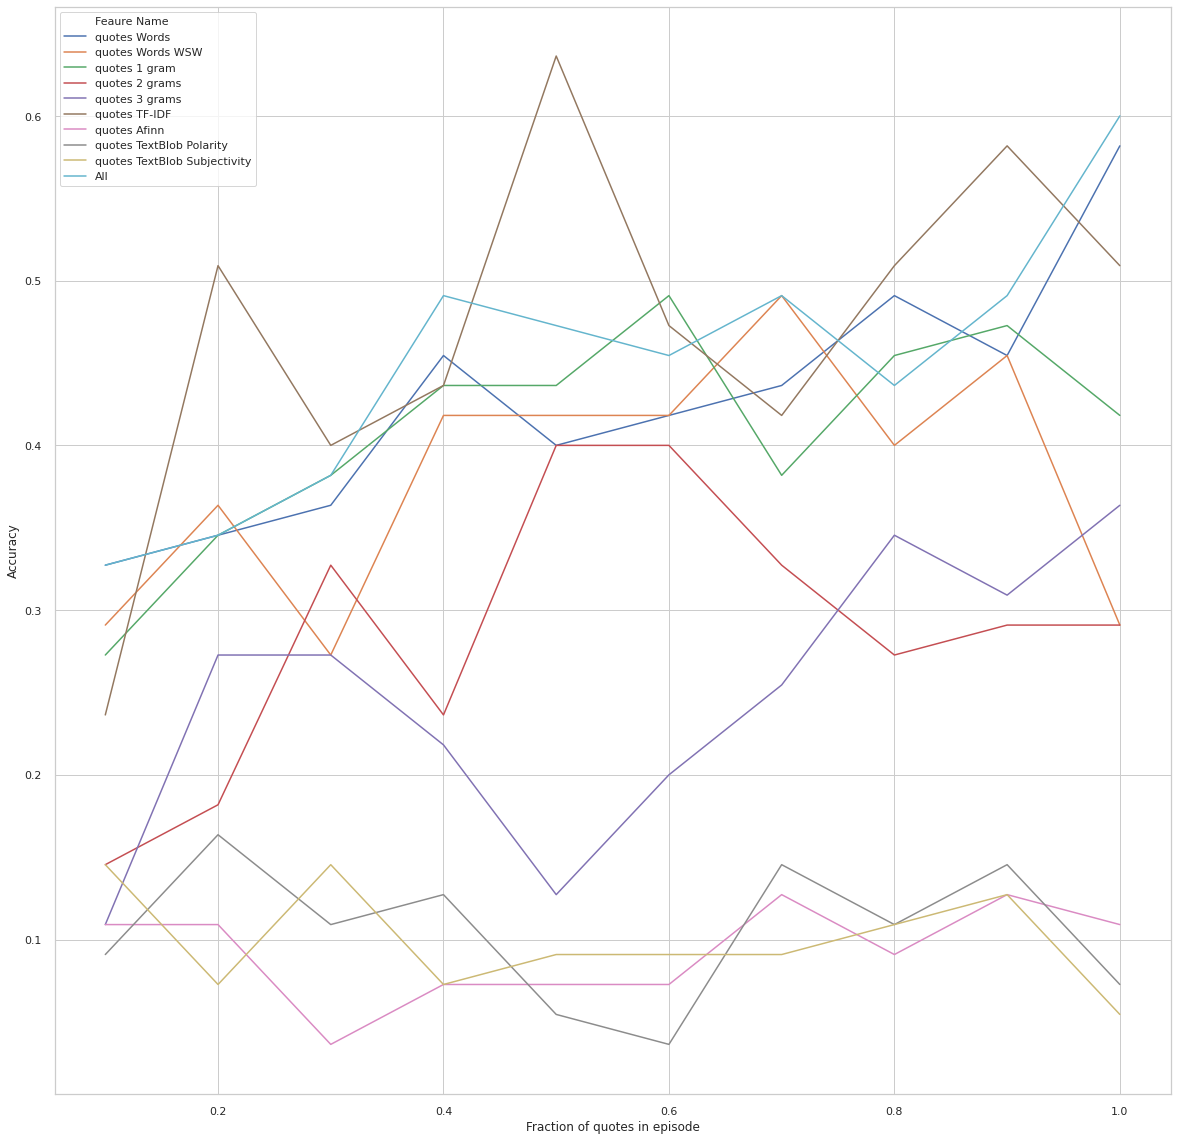

In [0]:
ax = sns.lineplot(x='Fraction of quotes in episode', y="Accuracy",
                  hue="Feaure Name",
                  markers=True, dashes=False, data=df_all)

Visualizing the results. 
It looks like **All the features together** for the quotes with 100% quotes for each episode results with the best AUC for the classification. 

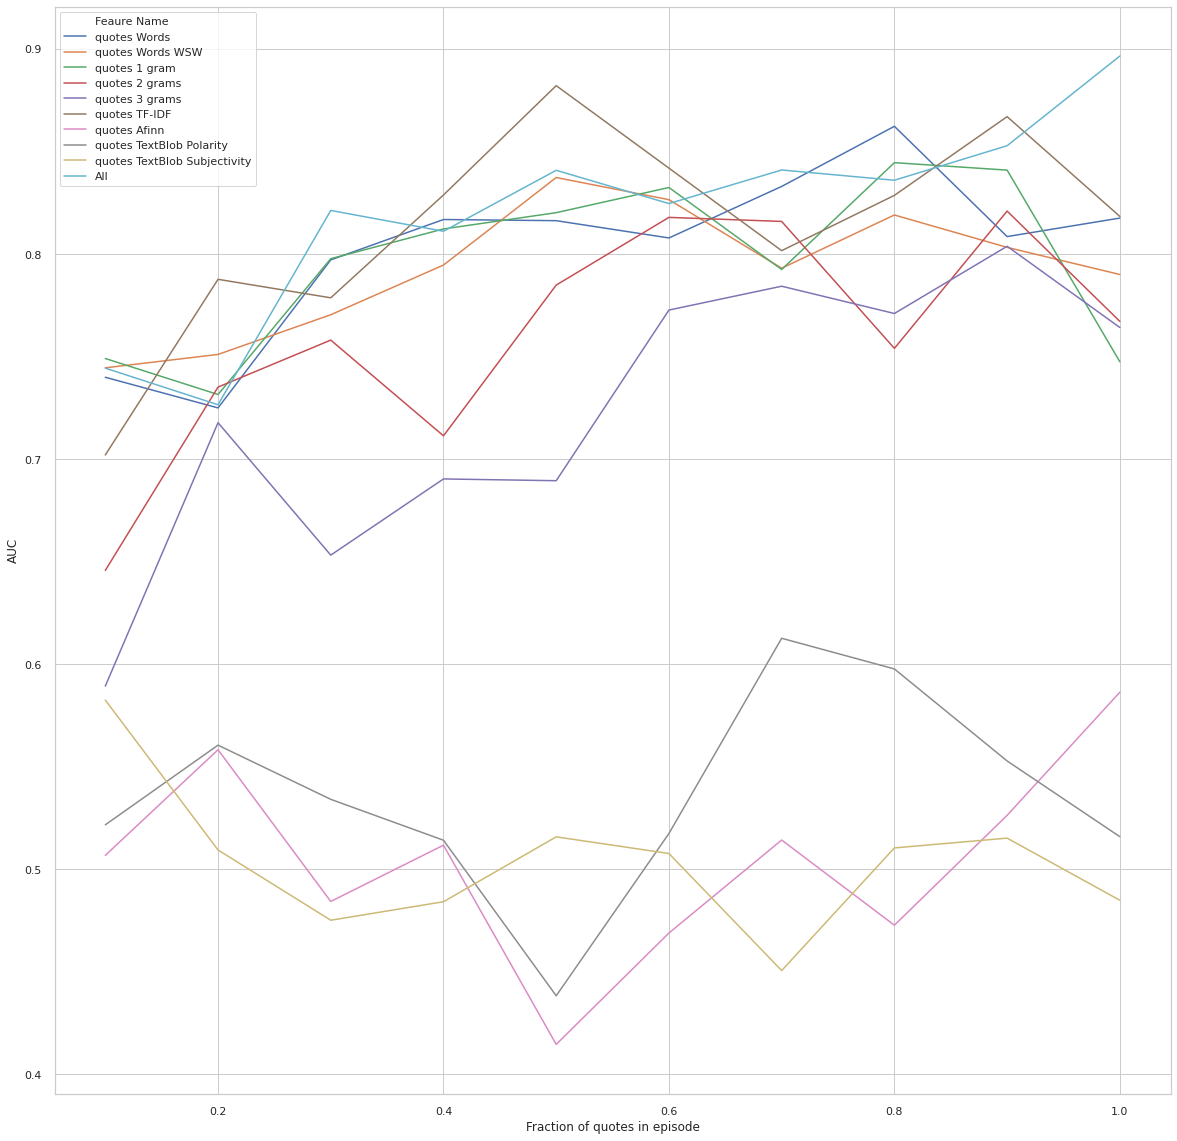

In [0]:
ax = sns.lineplot(x='Fraction of quotes in episode', y="AUC",
                  hue="Feaure Name",
                  markers=True, dashes=False, data=df_all)